# Проект: Линейные модели в машинном обучении

**Описание проекта**

- Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
- Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
- Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
   - Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
   - Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
- С помощью модели нужно отобрать коров по двум критериям:
   - средний удой за год — не менее 6000 килограммов;
   - молоко должно быть вкусным.

**Описание данных**

Вы будете работать с тремя датасетами:
- ferma_main.csv
- ferma_dad.csv
- cow_buy.csv

- Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент. **Описание данных:**
   - `id` — уникальный идентификатор коровы.
   - `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
   - `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
   - `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
   - `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
   - `Порода` — порода коровы.
   - `Тип пастбища` — ландшафт лугов, на которых паслась корова.
   - `порода папы_быка` — порода папы коровы.
   - `Жирность,%` — содержание жиров в молоке (в процентах).
   - `Белок,%` — содержание белков в молоке (в процентах).
   - `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
   - `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
     
- Признаки в датасете `ferma_main.csv` можно разделить на группы.
   - Характеристики коровы: `id`, `Порода`, `порода папы_быка`, `Возраст`.
   - Характеристики корма: `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г`, `СПО (Сахаро-протеиновое соотношение)`.
   - Характеристика пастбища: `Тип пастбища`.
   - Характеристики молока: `Удой, кг`, `Жирность, %`, `Белок, %`, `Вкус молока`.
- Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.

- Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера. **Описание данных:**
   - `id` — уникальный идентификатор коровы.
   - `Имя Папы` — имя папы коровы.

- Файл `cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. **Описание данных:**
   - `Порода` — порода коровы.
   - `Тип пастбища` — ландшафт лугов, на которых паслась корова.
   - `порода папы_быка` — порода папы коровы.
   - `Имя_папы` — имя папы коровы.
   - `Текущая_жирность, %` — содержание жиров в молоке (в процентах).
   - `Текущий_уровень_белок, %` — содержание белков в молоке (в процентах).
   - `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
- Данные в файлах `ferma_main.csv` и `cow_buy.csv` похожи, но у датасета `cow_buy.csv` несколько особенностей.
Содержание *белков* и *жиров* в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
Параметры корма `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)` отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на *5%*.
Кроме того, отсутствуют признаки `Удой, кг` и `Вкус молока`. Это целевые признаки, именно их предстоит предсказать!

## Загрузка данных и импорт необходимых библиотек

In [1]:
# для работы с датафреймами и визуализации
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik

#для работы с МО
import numpy as np
from scipy import stats as st
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (r2_score, mean_squared_error, root_mean_squared_error, 
mean_absolute_error, confusion_matrix, recall_score, precision_score, accuracy_score)

In [2]:
try:
    ferma_main_df = pd.read_csv('/datasets/ferma_main.csv', sep=';')
    ferma_dad_df = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
    cow_buy_df = pd.read_csv('/datasets/cow_buy.csv', sep=';')
except:
    ferma_main_df = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';')
    ferma_dad_df = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';')
    cow_buy_df = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';')

Данные загружены успешно, все библиотеки импортированы.

### Изучение общей информации о полученном датафрейме

In [3]:
def check_df(df):
    display(df.info())
    display(df.head())
    display(df.describe())

check_df(ferma_main_df)
print()
check_df(ferma_dad_df)
print()
check_df(cow_buy_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

None

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


,id,"Удой, кг","Сырой протеин, г"
count,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,1922.682965
std,183.096982,1638.401021,182.392548
min,1.000000,5204.000000,1660.000000
25%,159.250000,5751.750000,1772.250000
50%,317.500000,6130.500000,1880.500000
75%,475.750000,6501.000000,2058.750000
max,629.000000,45616.000000,2349.000000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,id
count,629.00000
mean,315.00000
std,181.72094
min,1.00000
25%,158.00000
50%,315.00000
75%,472.00000
max,629.00000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


None

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
count,20,20,20,20,20,20,20
unique,2,2,2,4,12,12,2
top,РефлешнСоверинг,равнинное,Соверин,Буйный,"3,59","3,074",более_2_лет
freq,11,11,12,8,3,5,15


Данные склеены разделителем ";".
Добавлю параметр *sep* при загрузке данных.

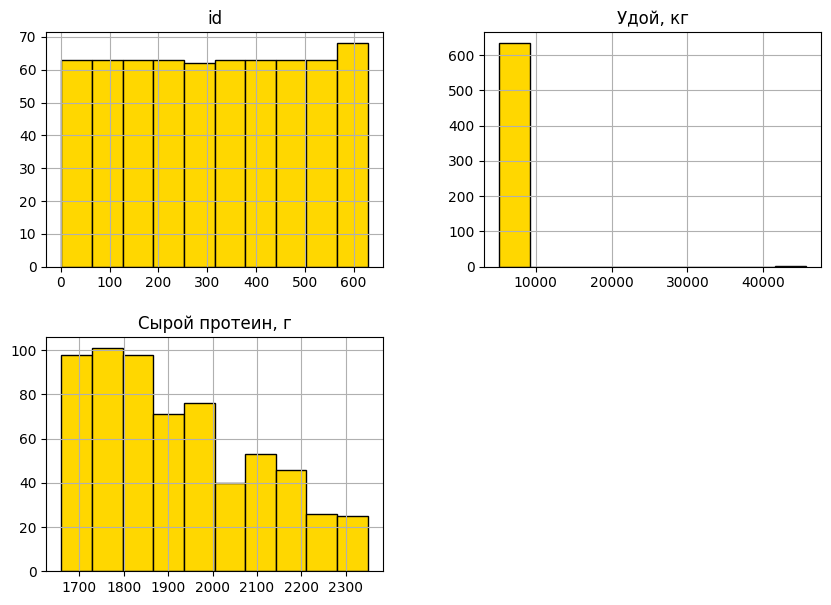

In [4]:
ferma_main_df.hist(figsize=(10, 7), color='gold', edgecolor='black')
plt.show()

### Вывод по изучению данных

1. Все три датафрейма загружены корректно с помощью разделителя ";". В данных нет пропущенных значений, что является хорошим показателем качества.

2. Общая информация:
- ferma_main_df: 634 записи и 12 колонок. Большинство колонок имеют тип object, что требует преобразования некоторых из них (например, ЭКЕ, Жирность,%, Белок,%) в числовой формат.
- ferma_dad_df: 629 записей и 2 колонки, обе с корректными типами данных, готовыми для анализа.
- cow_buy_df: 20 записей и 7 колонок, все с типом object, указывающим на категориальные данные.

3. Для ferma_main_df проведен описательный анализ, который показал, что Удой, кг варьируется от 5204 до 6290, а Сырой протеин, г — от 1660 до 2349.

4. Для ferma_main_df построены гистрограмы, в удое явно есть выброс.

## Предобработка данных

### Обработка типов данных

In [5]:
# приведу тип данных к рекомендуемому для представленных значений
def convert_columns_to_float(df, columns):
    for col in columns:
        df[col] = df[col].str.replace(',', '.').astype('float32')
    return df

ferma_main_columns = [
    'ЭКЕ (Энергетическая кормовая единица)',
    'СПО (Сахаро-протеиновое соотношение)',
    'Жирность,%',
    'Белок,%'
]
ferma_main_df = convert_columns_to_float(ferma_main_df, ferma_main_columns)
display(ferma_main_df.dtypes)

cow_buy_columns = [
    'Текущая_жирность,%',
    'Текущий_уровень_белок,%'
]
cow_buy_df = convert_columns_to_float(cow_buy_df, cow_buy_columns)
display(cow_buy_df.dtypes)

id                                         int64
Удой, кг                                   int64
ЭКЕ (Энергетическая кормовая единица)    float32
Сырой протеин, г                           int64
СПО (Сахаро-протеиновое соотношение)     float32
Порода                                    object
Тип пастбища                              object
порода папы_быка                          object
Жирность,%                               float32
Белок,%                                  float32
Вкус молока                               object
Возраст                                   object
dtype: object

Порода                      object
Тип пастбища                object
порода папы_быка            object
Имя_папы                    object
Текущая_жирность,%         float32
Текущий_уровень_белок,%    float32
Возраст                     object
dtype: object

Типы данных заменены.

### Обработка пропусков и дубликатов

Явные дубликаты удалению и обработке не подлежат по причине: мало признаков. Коровы в стаде могут быть похожи друг на друга по многим параметрам.

#### Обработка неявных дубликатов

In [6]:
def preprocess_column(column):
    return column.str.lower().str.replace('ё', 'е', regex=False).str.replace('_', ' ', regex=False)

def display_value_counts(df, columns):
    for column in columns:
        processed_column = preprocess_column(df[column])
        display(processed_column.value_counts())
        print()

display_value_counts(ferma_main_df, ['Порода', 'Тип пастбища', 'порода папы_быка', 'Вкус молока', 'Возраст'])
print('----------------------------')

display(preprocess_column(ferma_dad_df['Имя Папы']).value_counts())
print('----------------------------')

display_value_counts(cow_buy_df, ['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы', 'Возраст'])

Порода
вис бик айдиал     373
рефлешнсоверинг    261
Name: count, dtype: int64

Тип пастбища
холмистое    356
равнинное    253
равнинные     25
Name: count, dtype: int64

порода папы_быка
соверин    316
айдиал     240
айдиалл     78
Name: count, dtype: int64

Вкус молока
вкусно       371
не вкусно    263
Name: count, dtype: int64

Возраст
более 2 лет    524
менее 2 лет    110
Name: count, dtype: int64


----------------------------


Имя Папы
барин       240
буйный      215
соловчик    110
геркулес     64
Name: count, dtype: int64

----------------------------


Порода
рефлешнсоверинг    11
вис бик айдиал      9
Name: count, dtype: int64

Тип пастбища
равнинное    11
холмистое     9
Name: count, dtype: int64

порода папы_быка
соверин    12
айдиал      8
Name: count, dtype: int64

Имя_папы
буйный      8
геркулес    6
барин       4
соловчик    2
Name: count, dtype: int64

Возраст
более 2 лет    15
менее 2 лет     5
Name: count, dtype: int64

Обнаружены неявные дубликаты в столбце "тип пастбища" и "порода папы быка".

In [7]:
# приведение к нижнему регистру и удаление пробелов
ferma_main_df['Тип пастбища'] = ferma_main_df['Тип пастбища'].str.lower().str.strip()
ferma_main_df['порода папы_быка'] = ferma_main_df['порода папы_быка'].str.lower().str.strip()
ferma_main_df['Порода'] = ferma_main_df['Порода'].str.lower().str.strip()
cow_buy_df['Порода'] = ferma_main_df['Порода'].str.lower().str.strip()
cow_buy_df['порода папы_быка'] = ferma_main_df['порода папы_быка'].str.lower().str.strip()

# замена значений
ferma_main_df['Тип пастбища'] = ferma_main_df['Тип пастбища'].str.replace('равнинные', 'равнинное', regex=False)
ferma_main_df['Порода'] = ferma_main_df['Порода'].str.replace('вис бик айдиал', 'айдиал', regex=False)
ferma_main_df['Порода'] = ferma_main_df['Порода'].str.replace('рефлешнсоверинг', 'соверин', regex=False)
ferma_main_df['порода папы_быка'] = ferma_main_df['порода папы_быка'].str.replace('айдиалл', 'айдиал', regex=False)

cow_buy_df['Порода'] = ferma_main_df['Порода'].str.replace('рефлешнсоверинг', 'соверин', regex=False)
cow_buy_df['Порода'] = ferma_main_df['Порода'].str.replace('вис бик айдиал', 'айдиал', regex=False)
cow_buy_df['порода папы_быка'] = ferma_main_df['порода папы_быка'].str.replace('айдиалл', 'айдиал', regex=False)

display_value_counts(ferma_main_df, ['Порода', 'Тип пастбища', 'порода папы_быка', 'Вкус молока', 'Возраст'])
print('----------------------------')
display_value_counts(cow_buy_df, ['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы', 'Возраст'])

Порода
айдиал     373
соверин    261
Name: count, dtype: int64

Тип пастбища
холмистое    356
равнинное    278
Name: count, dtype: int64

порода папы_быка
айдиал     318
соверин    316
Name: count, dtype: int64

Вкус молока
вкусно       371
не вкусно    263
Name: count, dtype: int64

Возраст
более 2 лет    524
менее 2 лет    110
Name: count, dtype: int64


----------------------------


Порода
айдиал     11
соверин     9
Name: count, dtype: int64

Тип пастбища
равнинное    11
холмистое     9
Name: count, dtype: int64

порода папы_быка
айдиал     10
соверин    10
Name: count, dtype: int64

Имя_папы
буйный      8
геркулес    6
барин       4
соловчик    2
Name: count, dtype: int64

Возраст
более 2 лет    15
менее 2 лет     5
Name: count, dtype: int64

Данные очищены от неявных дубликатов.

### Обработка названий столбцов

In [8]:
ferma_main_df = ferma_main_df.rename(columns={
    'Удой, кг': 'удой_кг',
    'ЭКЕ (Энергетическая кормовая единица)': 'эке',
    'Сырой протеин, г': 'сырой_протеин_г',
    'СПО (Сахаро-протеиновое соотношение)': 'спо',
    'Порода': 'порода',
    'Тип пастбища': 'тип_пастбища',
    'порода папы_быка': 'порода_папы',
    'Жирность,%': 'жирность_прц',
    'Белок,%': 'белок_прц',
    'Вкус молока': 'вкус',
    'Возраст': 'возраст',
})

ferma_dad_df = ferma_dad_df.rename(columns={
    'Имя Папы': 'имя_папы'
})

cow_buy_df = cow_buy_df.rename(columns={
    'Порода': 'порода',
    'Тип пастбища': 'тип_пастбища',
    'порода папы_быка': 'порода_папы',
    'Имя_папы': 'имя_папы',
    'Текущая_жирность,%': 'текущая_жирность_прц',
    'Текущий_уровень_белок,%': 'текущий_белок_прц',
    'Возраст': 'возраст',
})


print(ferma_main_df.columns)
print(cow_buy_df.columns)
print(ferma_dad_df.columns)

Index(['id', 'удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'порода',
       'тип_пастбища', 'порода_папы', 'жирность_прц', 'белок_прц', 'вкус',
       'возраст'],
      dtype='object')
Index(['порода', 'тип_пастбища', 'порода_папы', 'имя_папы',
       'текущая_жирность_прц', 'текущий_белок_прц', 'возраст'],
      dtype='object')
Index(['id', 'имя_папы'], dtype='object')


### Вывод по предобработке данных

В процессе предобработки данных в датафреймах `ferma_main_df`, `ferma_dad_df` и `cow_buy_df` были выполнены следующие шаги:

1. **Обработка типов данных**:
   - Приведение значений в определенных столбцах к типу `float32` для более эффективного хранения и обработки данных. Для этого использовалась функция `convert_columns_to_float`, которая также заменяла запятые на точки в строковых значениях.

2. **Обработка пропусков и дубликатов**:
   - Проведен анализ на наличие пропусков в данных, результаты показали, что в столбцах `ferma_main_df` отсутствуют пропуски, однако обнаружены 5 явных дубликатов. В `ferma_dad_df` и `cow_buy_df` также не было пропусков, но в `cow_buy_df` были 4 дубликата.
   - Все дубликаты были успешно удалены с помощью метода `drop_duplicates`.

3. **Обработка неявных дубликатов**:
   - Неявные дубликаты в столбцах, таких как "тип пастбища" и "порода папы быка", были обработаны путем приведения текста к нижнему регистру и удаления лишних пробелов.
   - Также проведена замена значений для унификации данных (например, заменены "равнинные" на "равнинное" и "айдиалл" на "айдиал").

4. **Обработка названий столбцов**:
   - Все названия столбцов были приведены к единому формату (строчные буквы) и переименованы для более удобного доступа и чтения. Это позволило избежать проблем с различиями в регистрах.

**Итог**

- В результате предобработки данные были очищены от дубликатов, приведены к единому формату, обработаны типы данных. Это создает хорошую основу для дальнейшего анализа и моделирования. Теперь данные готовы к использованию в аналитических задачах и построении моделей.

## Исследовательский анализ данных

### Статистический анализ признаков

#### Количественные признаки

In [9]:
ferma_main_df.describe()

,id,удой_кг,эке,сырой_протеин_г,спо,жирность_прц,белок_прц
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,14.542744,1922.682965,0.912855,3.603943,3.075666
std,183.096982,1638.401021,1.301301,182.392548,0.032209,0.168020,0.002540
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,159.250000,5751.750000,13.500000,1772.250000,0.890000,3.590000,3.074000
50%,317.500000,6130.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,475.750000,6501.000000,15.600000,2058.750000,0.940000,3.720000,3.077000
max,629.000000,45616.000000,16.799999,2349.000000,0.960000,3.750000,3.085000


In [10]:
cow_buy_df.describe()

,текущая_жирность_прц,текущий_белок_прц
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


In [11]:
# функция для визуализации количественных данных
def hist_box_df(df, column, title):
    
    plt.figure(figsize=(16, 6))
    plt.suptitle(title, fontsize=16)
    
    # гистограмма с плотностью
    plt.subplot(1, 2, 1)
    plt.hist(df[column], bins=50, color='gold', alpha=0.7, edgecolor='black')  # Используем plt.hist
    plt.title('Гистограмма')
    plt.xlabel(title)
    plt.ylabel('Частота')
    
    # диаграмма размаха
    plt.subplot(1, 2, 2)
    plt.boxplot(df[column])
    plt.title('Ящик с усами')
    plt.xlabel(None)
    
    plt.show()

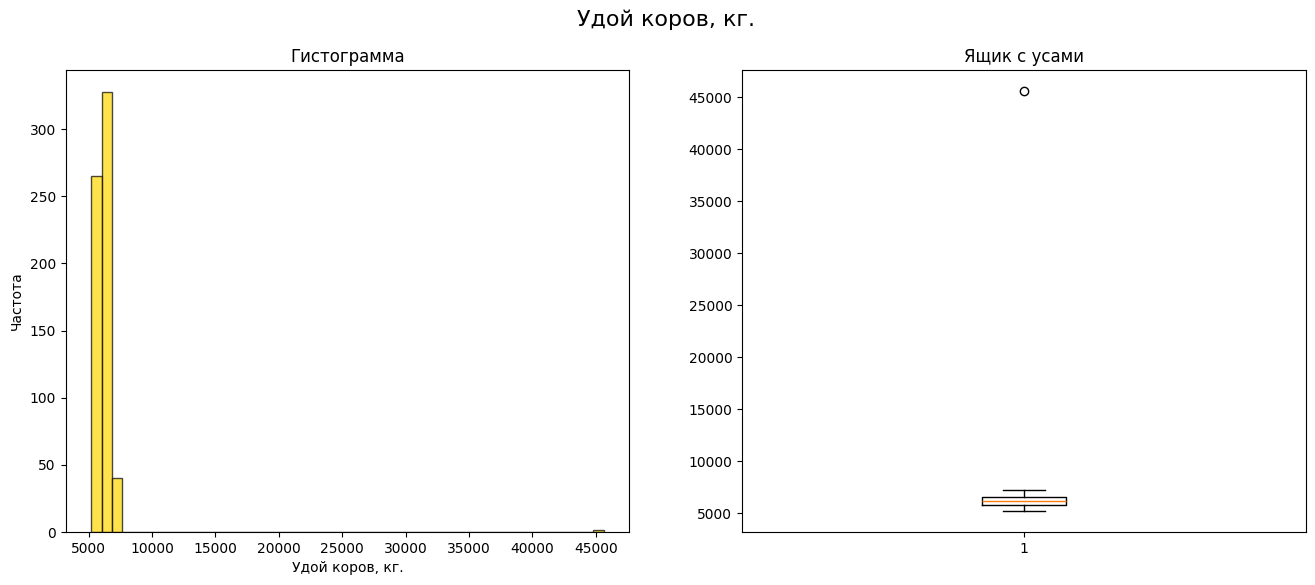

In [12]:
hist_box_df(ferma_main_df, 'удой_кг', 'Удой коров, кг.')

Графики показывают значение на 45000 кг. Это явно выброс.

<div class="alert alert-block alert-info">
<b>комментарии трудящихся: 
    
Будь я немного внимательнее на каждом этапе, тогда да) спасибо за совет!</b>
</div>

In [13]:
ferma_main_df.query('удой_кг >= 45000')

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы,жирность_прц,белок_прц,вкус,возраст
16,17,45616,11.5,1675,0.93,айдиал,холмистое,айдиал,3.22,3.076,вкусно,более_2_лет


Строка с удоем в 45.6 тыс. кг с коровы действительно есть. Так как это всего 1 строка, удалю ее.

In [14]:
ferma_main_df = ferma_main_df.query('удой_кг != 45616')

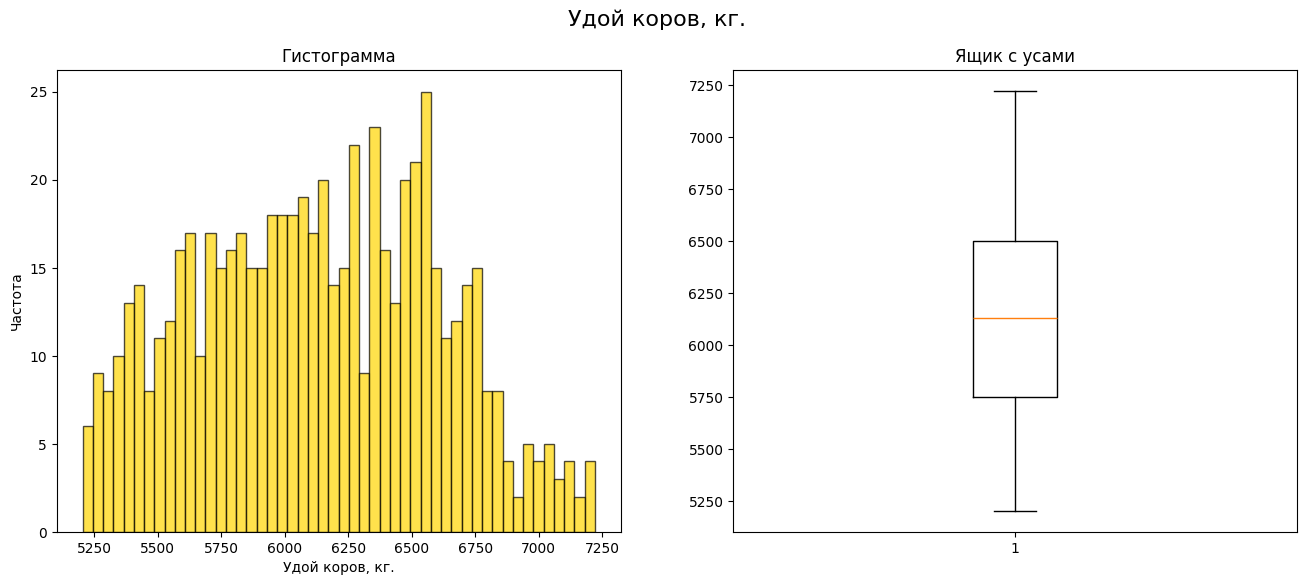

In [15]:
hist_box_df(ferma_main_df, 'удой_кг', 'Удой коров, кг.')

После удаления выброса, видно, что значения распределены примерно от 5250 до 7250 кг. Распределение почти нормальное, т.к. есть провал после 6600 кг.

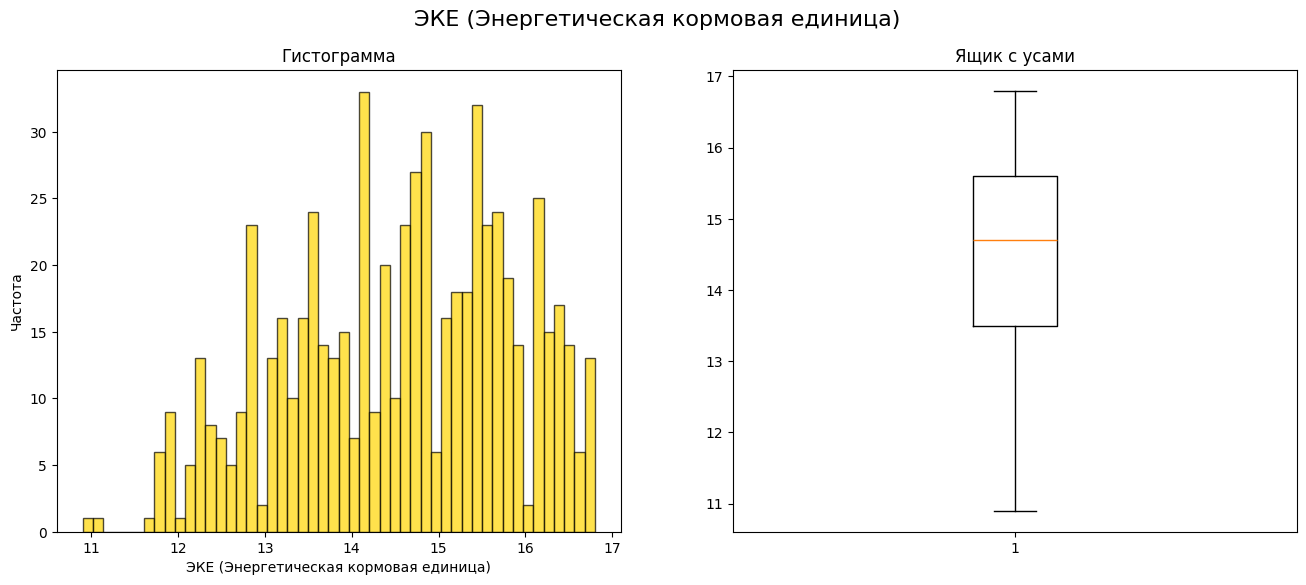

In [16]:
hist_box_df(ferma_main_df, 'эке', 'ЭКЕ (Энергетическая кормовая единица)')

- Значения от 11 до 17.
- Распределение похоже на нормальное, но с резким подъемом.
- Выбросов нет.

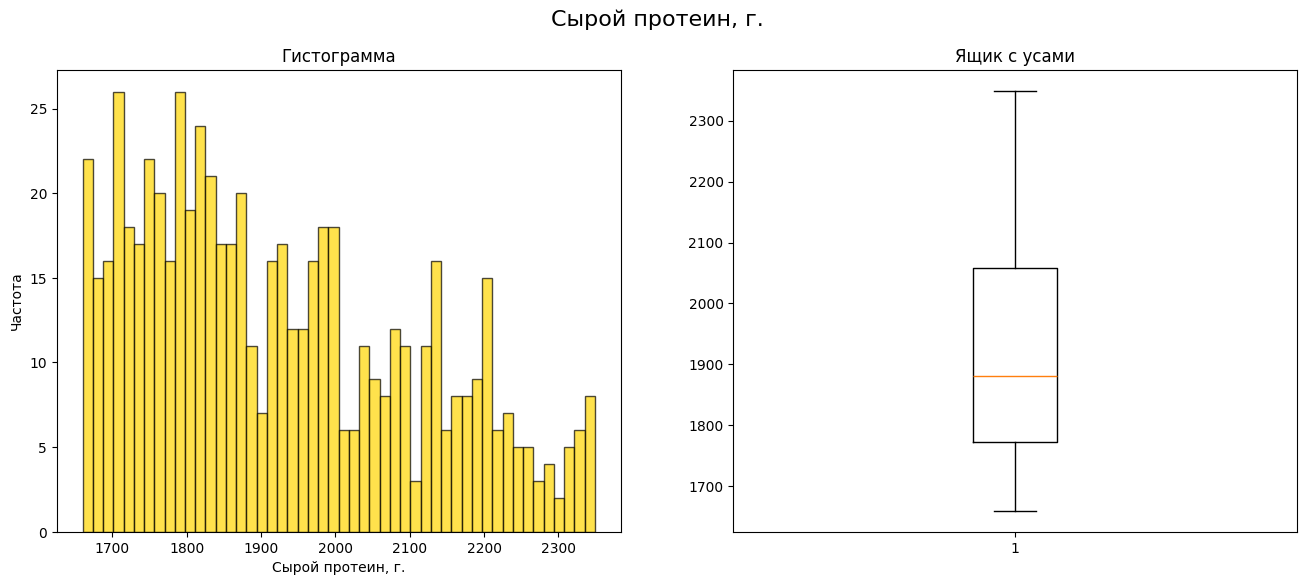

In [17]:
hist_box_df(ferma_main_df, 'сырой_протеин_г', 'Сырой протеин, г.')

- Значения от 1500 до 2500.
- Распределение на нормальное не похоже - видна убывающая тенденция.
- Выбросов нет.

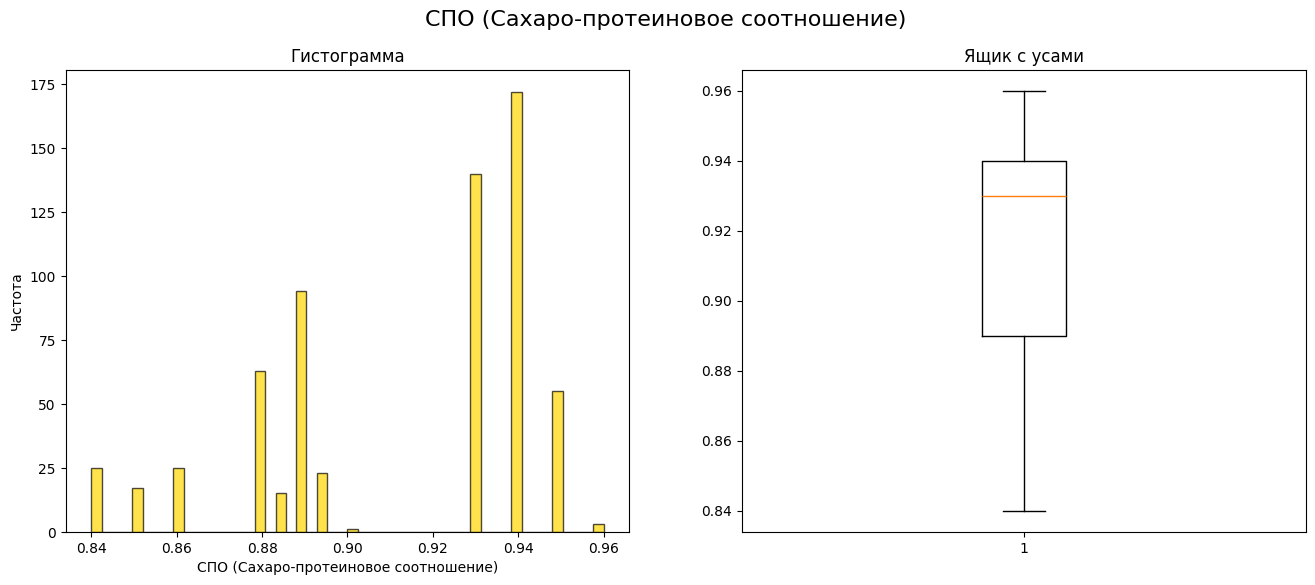

In [18]:
hist_box_df(ferma_main_df, 'спо', 'СПО (Сахаро-протеиновое соотношение)')

- Значения от 0.84 до 0.96.
- Распределение мультимодальное, левосторонее, с провалами в диапазонах значений.
- Выбросов нет.

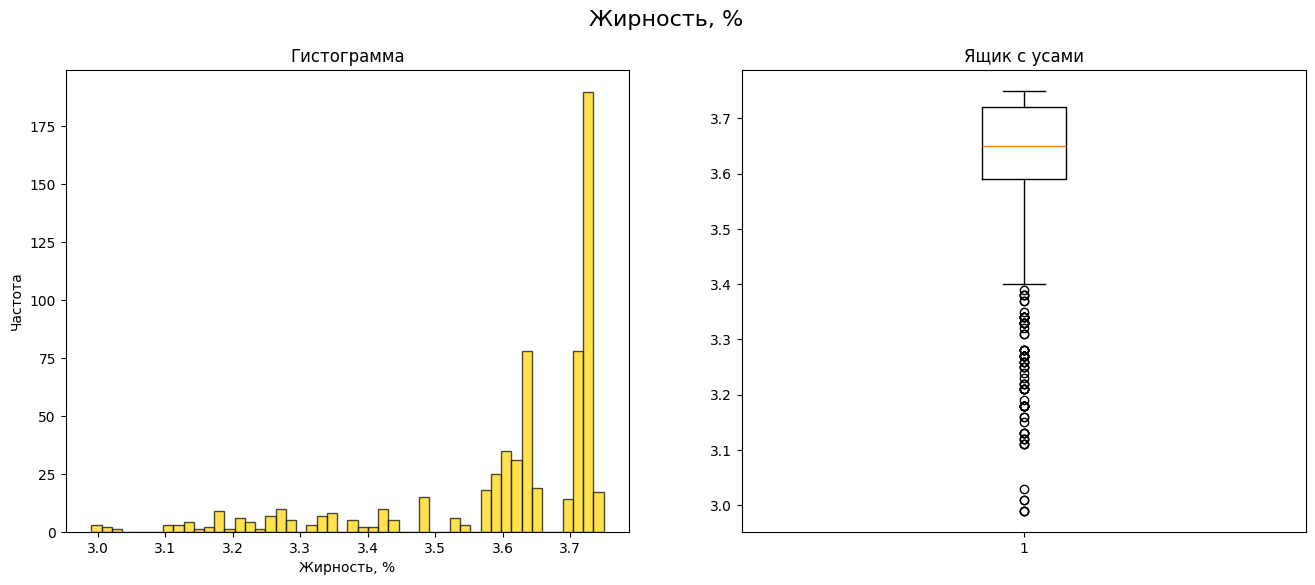

In [19]:
hist_box_df(ferma_main_df, 'жирность_прц', 'Жирность, %')

- Значения от 2.9 до 3.8.
- Распределение имеет характерный пик на уровне около 3.7%, что указывает на то, что наибольшее количество наблюдений сосредоточено в этом диапазоне жирности. Кроме того, есть небольшое количество наблюдений по более низким значениям жирности, что говорит о левостороннем распределении.
- Выбросов в случае с жирностью молока нет и быть не может, если значение выше 0.

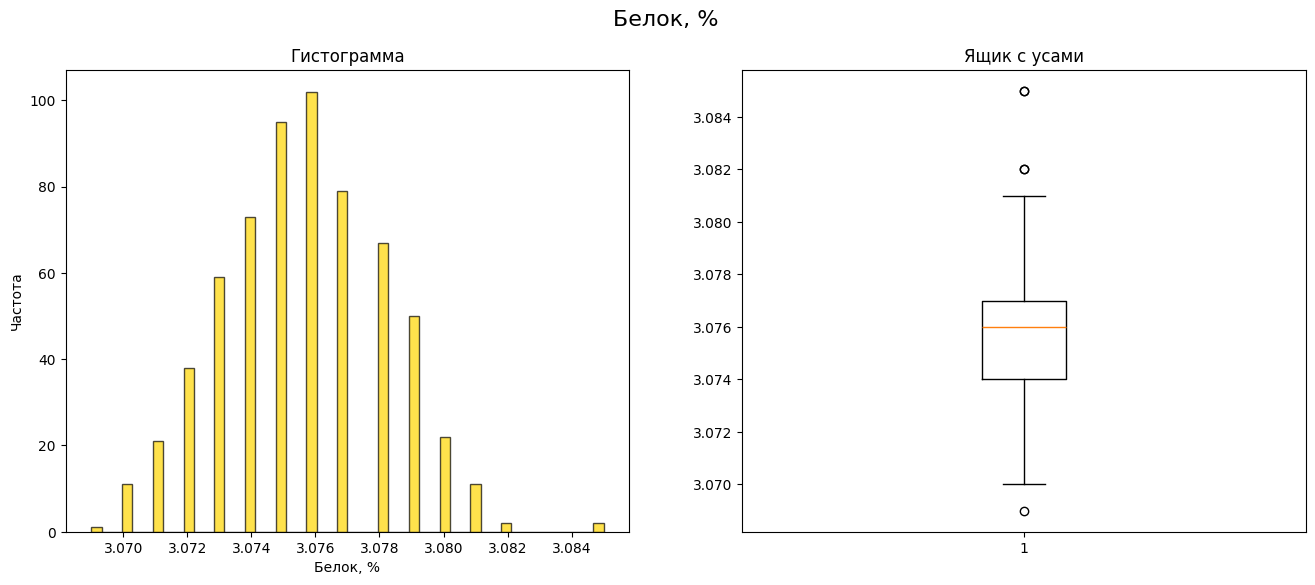

In [20]:
hist_box_df(ferma_main_df, 'белок_прц', 'Белок, %')

- Значения от 3 до 3.09.
- Распределение нормальное.
- Выбросов, как и в случае с жирностью нет.

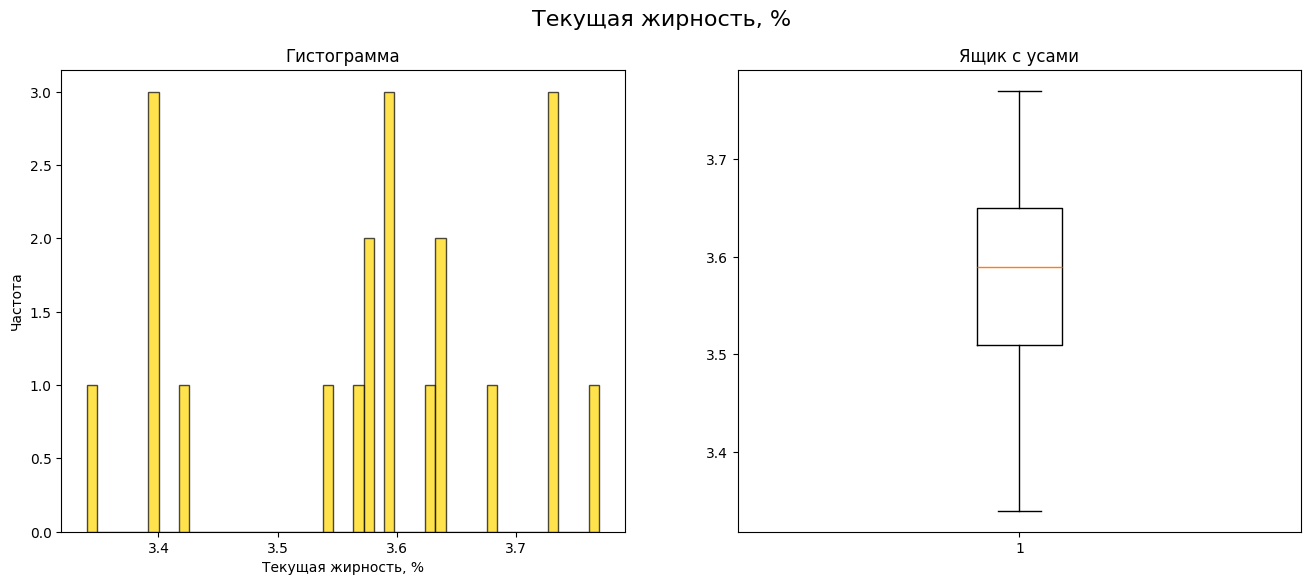

In [21]:
hist_box_df(cow_buy_df, 'текущая_жирность_прц', 'Текущая жирность, %')

- Значения от 3.3 до 3.8.
- Распределения нет. Всего 20 значений. Наибольшее количество значений соответсвуют 3.4, 3.6 и 3.75.
- Выбросов нет.

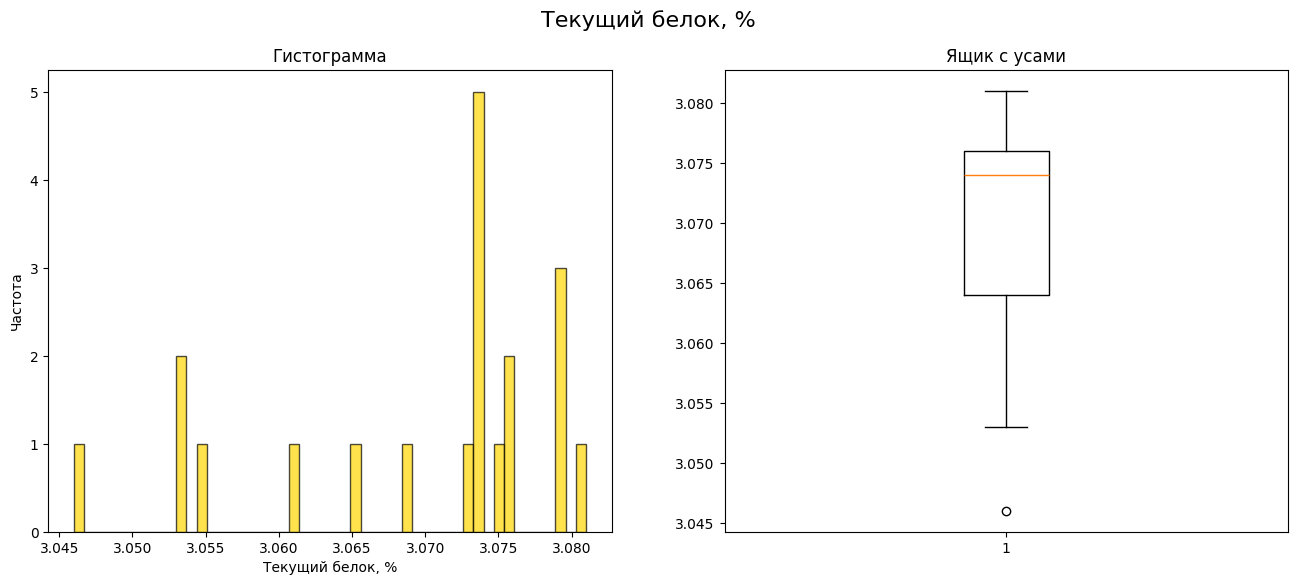

In [22]:
hist_box_df(cow_buy_df, 'текущий_белок_прц', 'Текущий белок, %')

- Значения от 3.05 до 3.08.
- Распределения нет. Всего 20 значений. Однако большая часть значений сосредоточена около 3.07 до 3.08.
- Выбрсов нет.

#### Категориальнные признаки

In [23]:
# фукнция для категориальных значений
def bar_plotter(df, column, title):

    plt.figure(figsize=(12, 5))
    
    counts = df[column].value_counts()

    bars = plt.bar(counts.index, counts.values, color='gold', edgecolor='black', alpha=0.7)
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval, int(yval),va='bottom')
        
    plt.title(title)
    plt.ylabel('Количество')
    plt.grid(axis='y')

    plt.show()

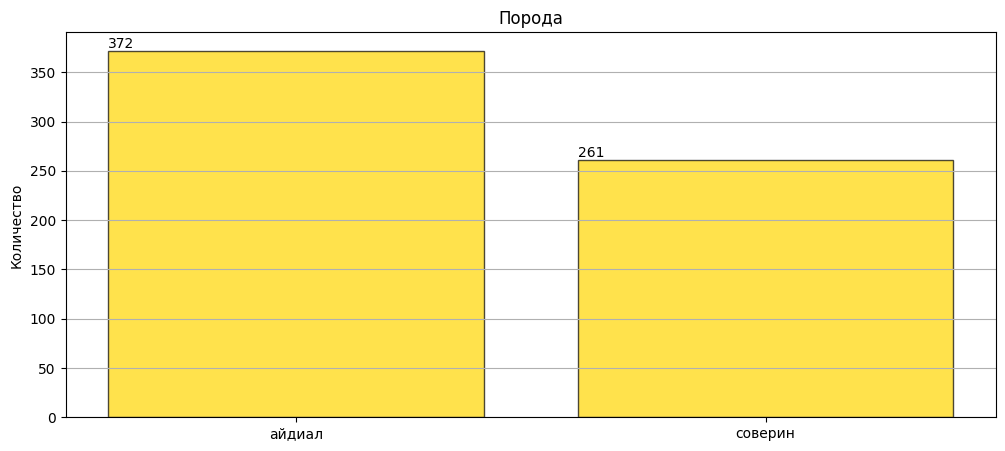

In [24]:
bar_plotter(ferma_main_df, 'порода', 'Порода')

- Количество коров породы "айдиал" больше, чем коров породы "соверин".

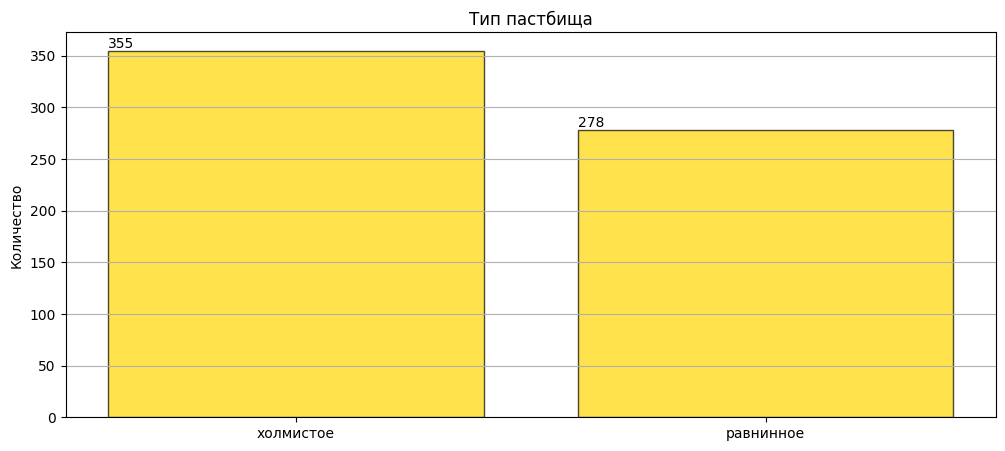

In [25]:
bar_plotter(ferma_main_df, 'тип_пастбища', 'Тип пастбища')

- Коровы больше пасутся на холмистых пастбищах.

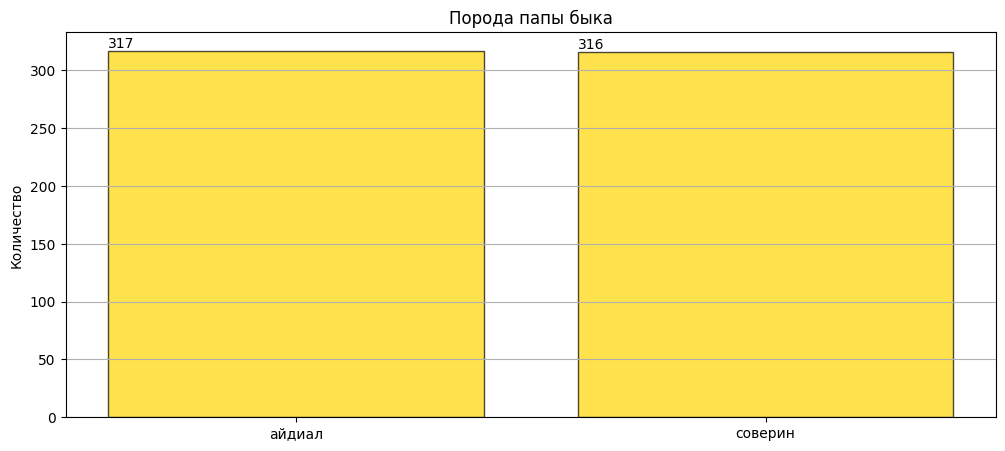

In [26]:
bar_plotter(ferma_main_df, 'порода_папы', 'Порода папы быка')

- Породы пап наших коров рапределены примерно поровну.

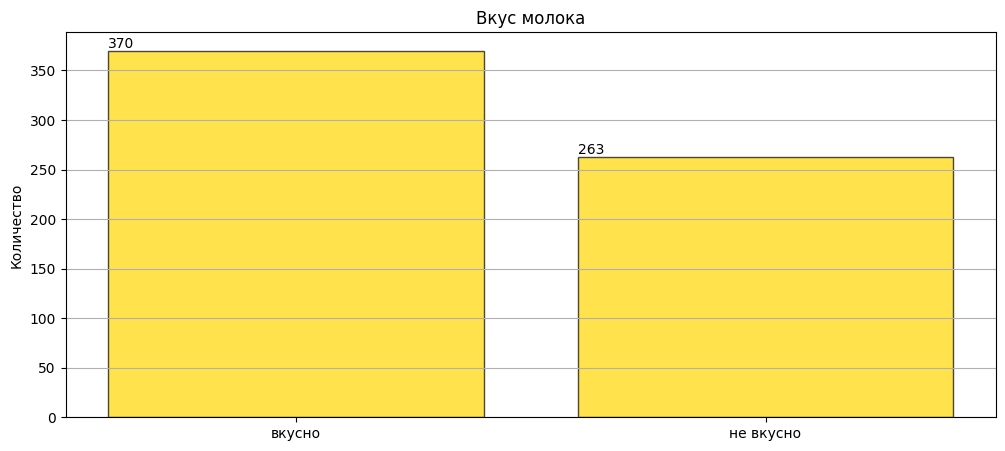

In [27]:
bar_plotter(ferma_main_df, 'вкус', 'Вкус молока')

- Молоко чаще всего вкусное.
- Количество коров, которые дают невкусное молоко достаточно велико (больше половины). С этим надо что-то делать.

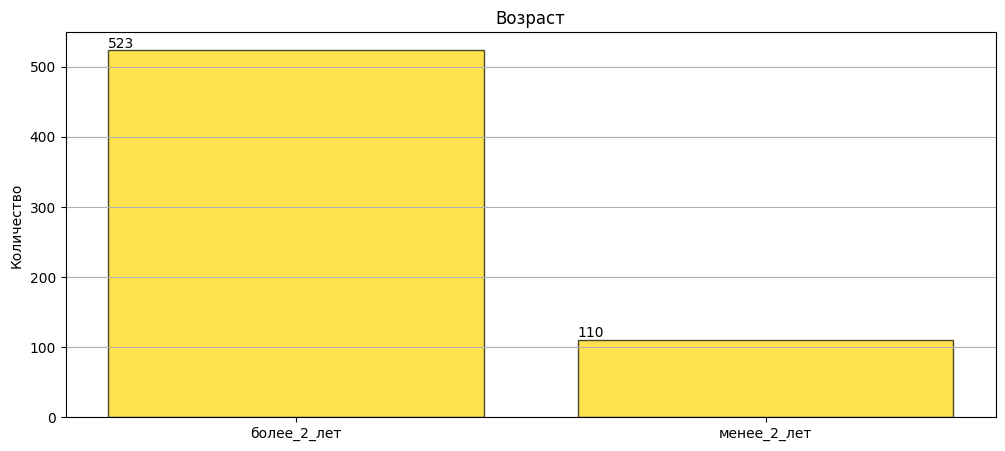

In [28]:
bar_plotter(ferma_main_df, 'возраст', 'Возраст')

В стаде 5/6 коров взрослые. Это хорошо.

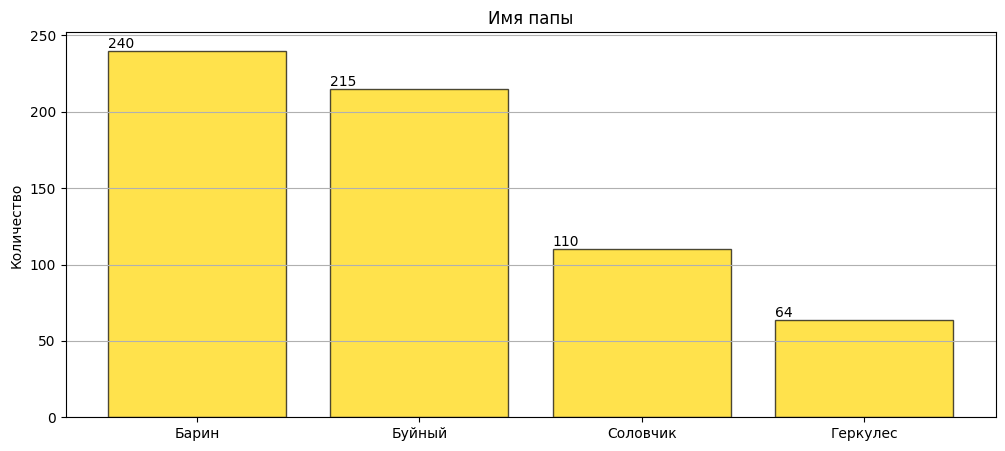

In [29]:
bar_plotter(ferma_dad_df, 'имя_папы', 'Имя папы')

- Имя папы наших кооров особой роли не играет в исследовании, но интересный факт, что любимое имя фермера - Барин.

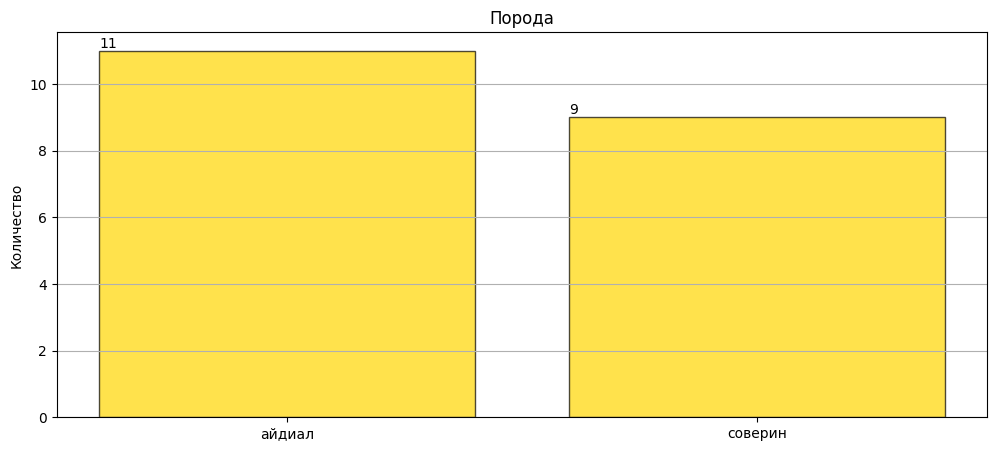

In [30]:
bar_plotter(cow_buy_df, 'порода', 'Порода')

- У продавца коров породы "айдиал" больше. Но это не страшно.

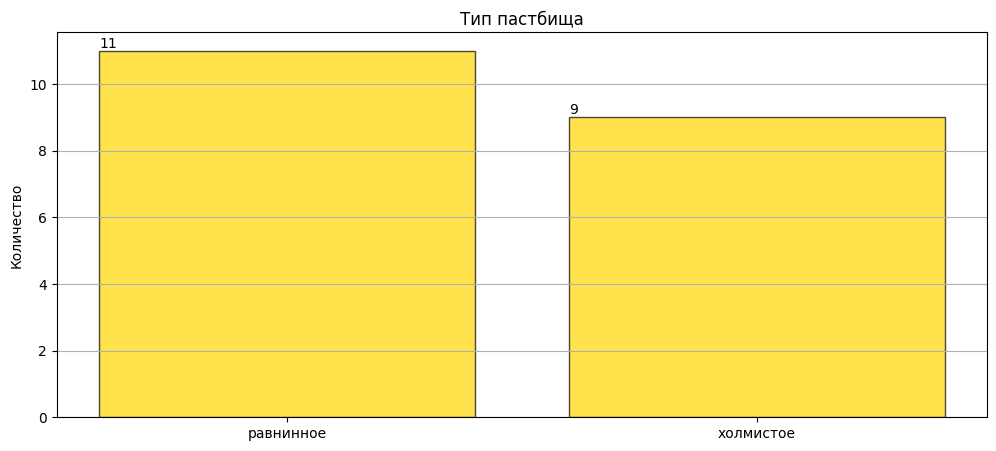

In [31]:
bar_plotter(cow_buy_df, 'тип_пастбища', 'Тип пастбища')

- Покупаемые коровы пасутся больше на равнинных пастбищах, как и собственные коровы. 

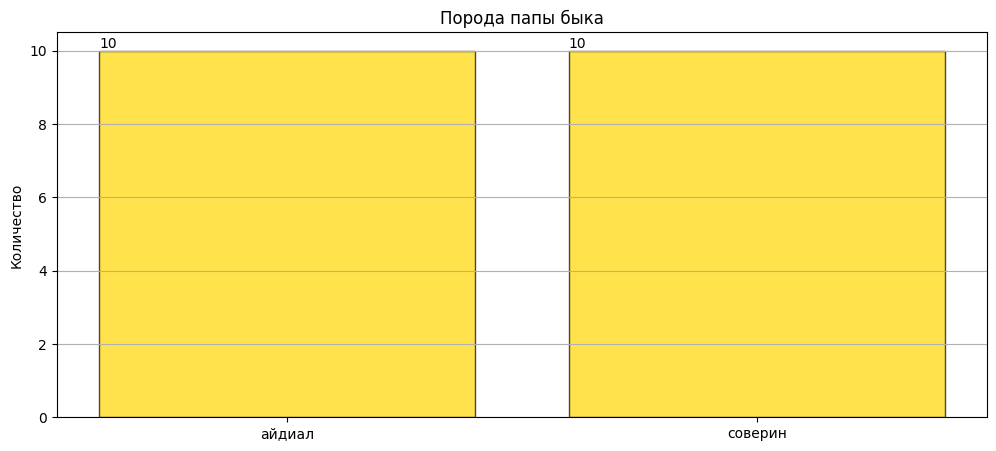

In [32]:
bar_plotter(cow_buy_df, 'порода_папы', 'Порода папы быка')

- Отцы у покупаемых коров распределены по породам поровну.

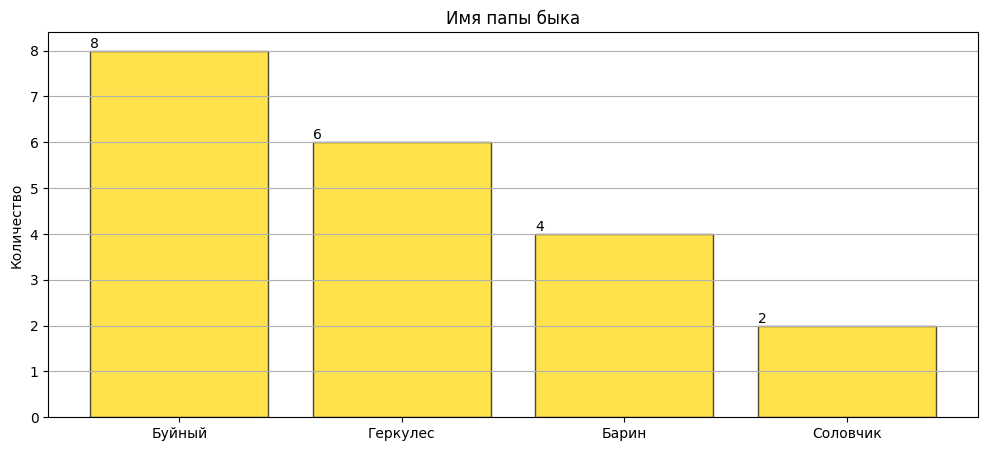

In [33]:
bar_plotter(cow_buy_df, 'имя_папы', 'Имя папы быка')

- А любимое имя для коровы у продавца - "Буйный". О чем это может говорить?...

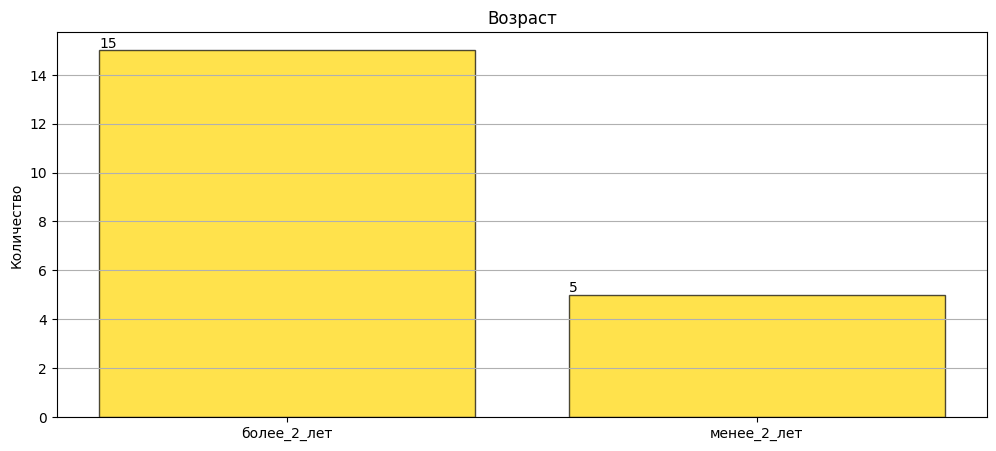

In [34]:
bar_plotter(cow_buy_df, 'возраст', 'Возраст')

- В основном продаются взрослые коровы. Это хорошо, потому что взрослые коровы сразу начинают приность доход и их не нужно выхаживать.

### Вывод по исследовательскому анализу данных

1. В целом, данные о коровах показывают, что большинство из них находятся в хорошем состоянии с хорошими показателями удоя, жирности и белка. 

2. Выбросы были выявлены и успешно удалены, что улучшило качество анализа. 

3. Необходимо провести дальнейший анализ по молоку, которое было описано как невкусное, чтобы понять причины и возможности улучшения. 

4. Также стоит обратить внимание на возраст коров при покупке, так как молодые коровы требуют больше времени и ресурсов, прежде чем начнут приносить доход.

## Корелляционный анализ

### Корреляционная матрица

interval columns not set, guessing: ['удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'жирность_прц', 'белок_прц']


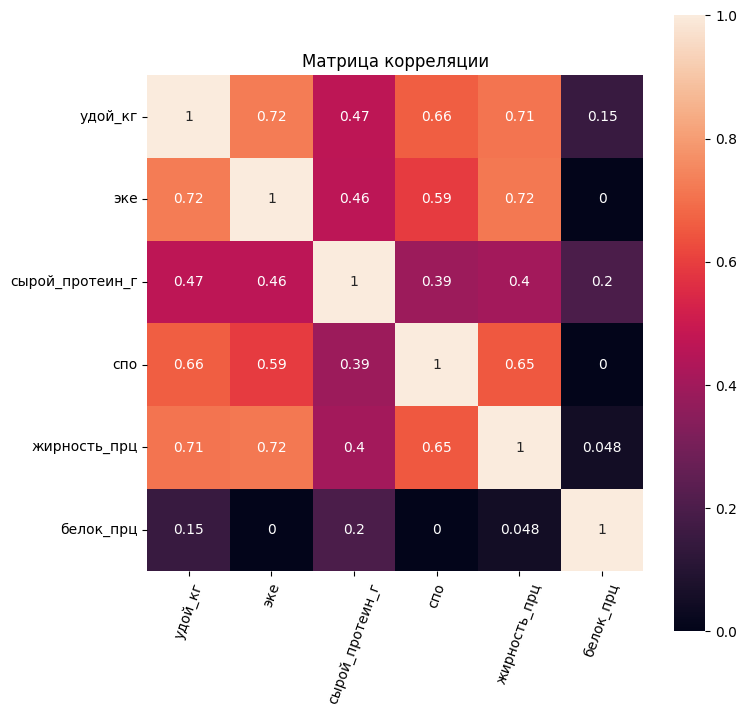

In [35]:
num_col_names = ['удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'жирность_прц', 'белок_прц']
ferma_main_filtered = ferma_main_df[num_col_names]

corr_matrix = ferma_main_filtered.phik_matrix()

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, square=True)
plt.title('Матрица корреляции')
plt.xticks(rotation=70)
plt.yticks()
plt.show()

In [36]:
# определение силы корреляции
def corr_strength(corr_value):
    if corr_value >= 0.7:
        return 'Сильная положительная корреляция'
    elif 0.3 <= corr_value < 0.7:
        return 'Умеренная положительная корреляция'
    elif -0.3 < corr_value < 0.3:
        return 'Отсутствие корреляции'
    elif -0.7 <= corr_value < -0.3:
        return 'Умеренная отрицательная корреляция'
    elif corr_value <= -0.7:
        return 'Сильная отрицательная корреляция'

corr_labels = corr_matrix.stack().apply(corr_strength).unstack()
corr_labels

,удой_кг,эке,сырой_протеин_г,спо,жирность_прц,белок_прц
удой_кг,Сильная положительная корреляция,Сильная положительная корреляция,Умеренная положительная корреляция,Умеренная положительная корреляция,Сильная положительная корреляция,Отсутствие корреляции
эке,Сильная положительная корреляция,Сильная положительная корреляция,Умеренная положительная корреляция,Умеренная положительная корреляция,Сильная положительная корреляция,Отсутствие корреляции
сырой_протеин_г,Умеренная положительная корреляция,Умеренная положительная корреляция,Сильная положительная корреляция,Умеренная положительная корреляция,Умеренная положительная корреляция,Отсутствие корреляции
спо,Умеренная положительная корреляция,Умеренная положительная корреляция,Умеренная положительная корреляция,Сильная положительная корреляция,Умеренная положительная корреляция,Отсутствие корреляции
жирность_прц,Сильная положительная корреляция,Сильная положительная корреляция,Умеренная положительная корреляция,Умеренная положительная корреляция,Сильная положительная корреляция,Отсутствие корреляции
белок_прц,Отсутствие корреляции,Отсутствие корреляции,Отсутствие корреляции,Отсутствие корреляции,Отсутствие корреляции,Сильная положительная корреляция


**1. Сильные положительные корреляции:**
Признаки `"удой_кг"` и `"эке"` имеют сильные положительные корреляции с другими признаками, что указывает на то, что увеличение одного из этих признаков связано с увеличением других.

Признаки `"сырой_протеин_г"`, `"спо"` и `"жирность_прц"` также имеют сильные положительные корреляции с несколькими другими признаками, что говорит о наличии взаимосвязей между ними. Это может указывать на то, что изменения в содержании сырого протеина могут быть связаны с изменениями в других показателях, таких как жирность и содержание сахара.

**2. Умеренные положительные корреляции:**
Признаки `"сырой_протеин_г"`, `"жирность_прц"` и `"белок_прц"` имеют умеренные положительные корреляции между собой и с другими признаками, что указывает на наличие определенной взаимозависимости, но эта зависимость не так выражена, как в случае сильных корреляций. Это может означать, что хотя эти признаки и связаны, изменения в одном из них не обязательно приводят к значительным изменениям в других.

**3. Отсутствие корреляции:**
Признак `"белок_прц"` имеет лишь одну сильную положительную корреляцию с `"сырой_протеин_г"`, и в остальных случаях его соотношение с другими признаками не демонстрирует заметных взаимосвязей. Это может указывать на то, что содержание белка не связано с другими указанными показателями или что факторы, влияющие на белок, значительно отличаются от факторов, влияющих на остальные признаки.

### Диаграммы рассеивания

In [37]:
# для колличественных значений
def scatter_ferma(df, column, title):

    plt.figure(figsize=(12, 5))

    plt.scatter(ferma_main_df['удой_кг'], df[column], color='gold', edgecolor='black', alpha=0.5)

    plt.title(f'{title} к удою (кг)')
    plt.xlabel('Удой, кг')
    plt.ylabel(title)
    
    plt.show()

# для категориальных значений
def scatter_ferma_cat(df, column, title):
    plt.figure(figsize=(12, 5))

    sns.scatterplot(data=df, x='удой_кг', y='эке', 
                    hue=column, style=column, edgecolor='black')
    
    plt.title(f'ЭКЕ к удою (кг)')
    plt.xlabel('Удой, кг')
    plt.ylabel(title)
    
    plt.show()

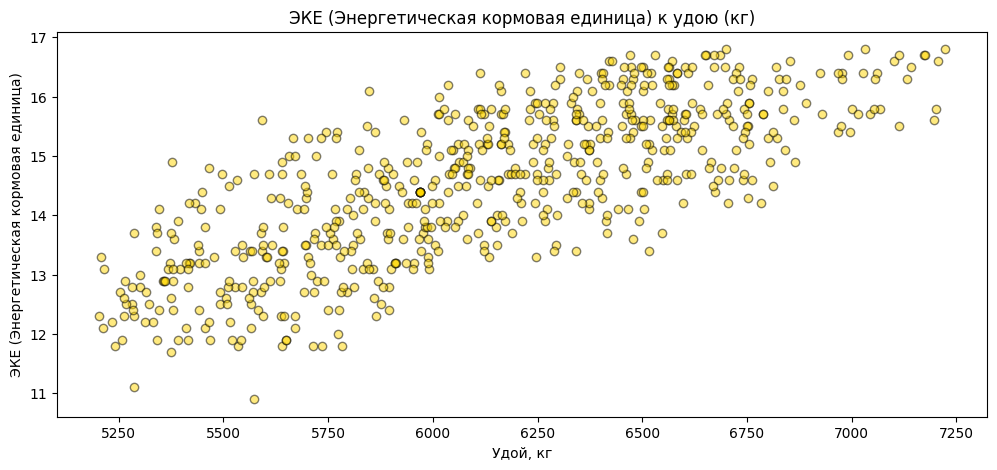

In [38]:
scatter_ferma(ferma_main_df, 'эке', 'ЭКЕ (Энергетическая кормовая единица)')

- Явный возрастающий тренд.
- Связь между переменными можно охарактеризовать как нелинейную, поскольку точки располагаются в виде параболического (изогнутого) облака с некоторым восходящим трендом.

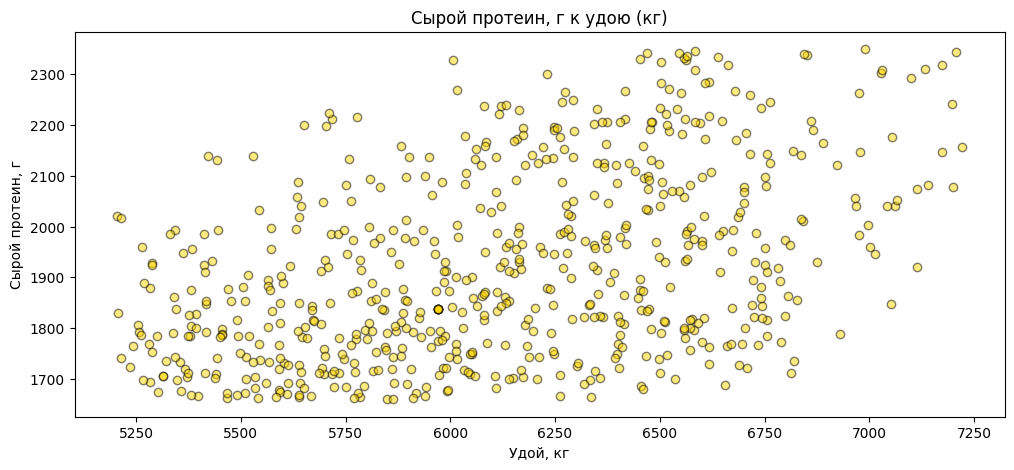

In [39]:
scatter_ferma(ferma_main_df, 'сырой_протеин_г', 'Сырой протеин, г')

- Более широкий, чем в предыдущем случае график, но все так же возрастающий, хоть и более умеренно.
- Слабая корреляция, но она есть.

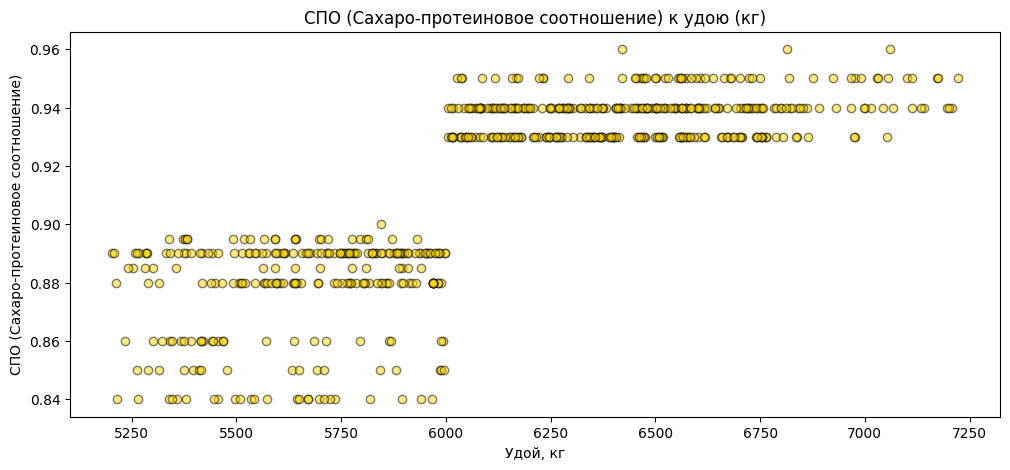

In [40]:
scatter_ferma(ferma_main_df, 'спо', 'СПО (Сахаро-протеиновое соотношение)')

- Видно две обособленные группы значений, они распределены в разных частях диаграммы, это может говорить о нелинейной зависимости
- Корреляция есть.

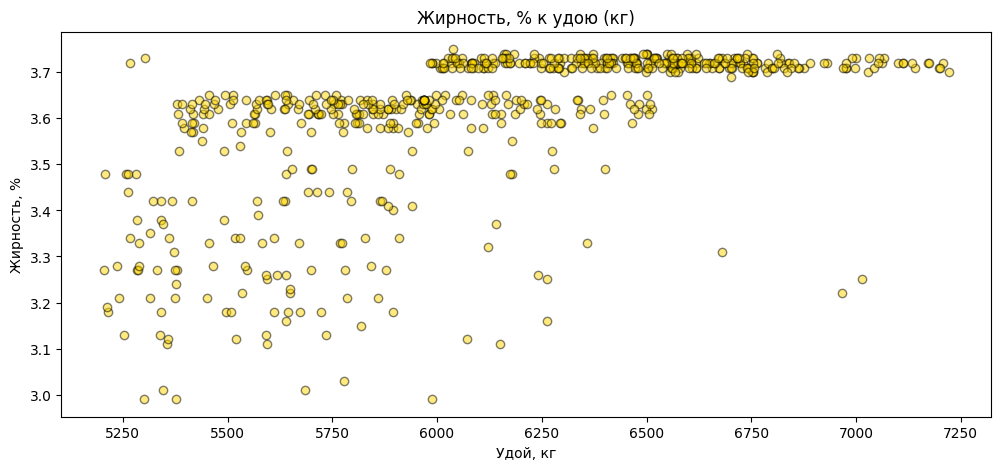

In [41]:
scatter_ferma(ferma_main_df, 'жирность_прц', 'Жирность, %')

- Данные разбиты на 2 плотных кластера и 1 менее объемный.
- Корреляция есть, но она слабее, чем в предыдущей диаграмме.

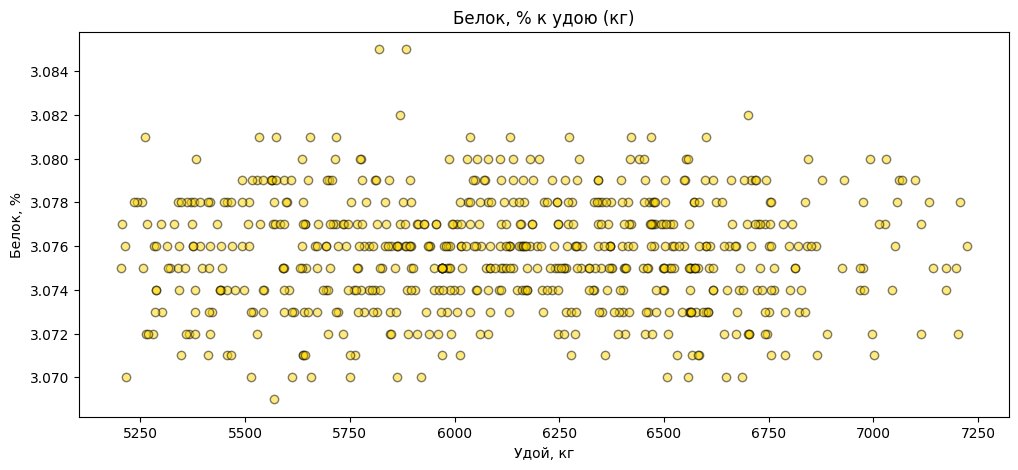

In [42]:
scatter_ferma(ferma_main_df, 'белок_прц', 'Белок, %')

- Корреляция отсутсвует

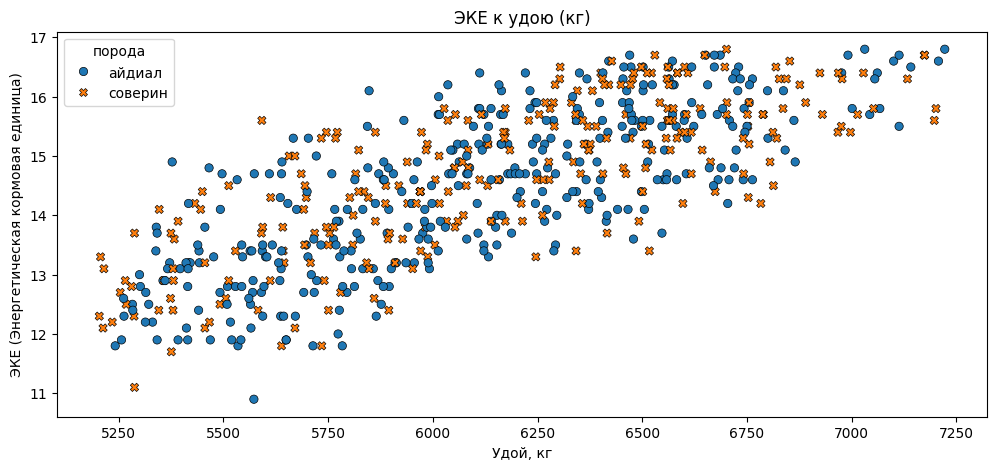

In [43]:
scatter_ferma_cat(ferma_main_df, 'порода', 'ЭКЕ (Энергетическая кормовая единица)')

- Значения породы достаточно равномерно рапределены, поэтому о корреляции между породой и годовым удоем не приходится, ее почти нет.

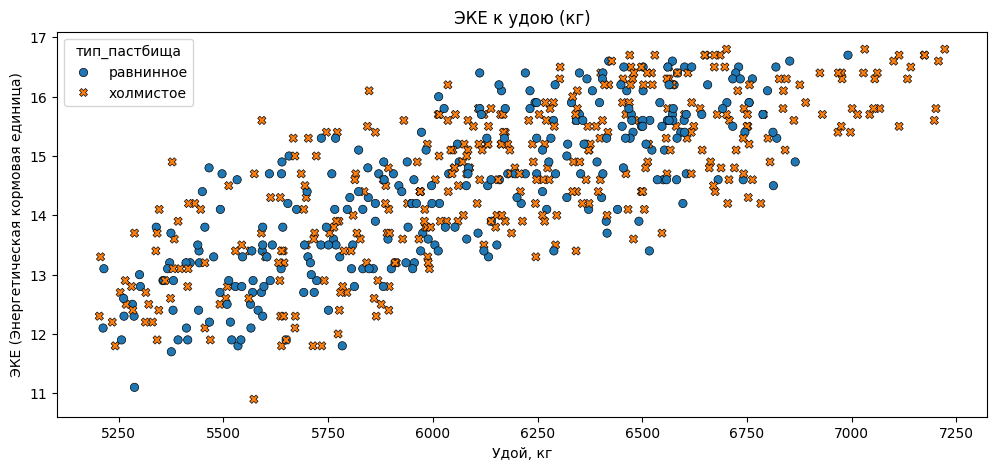

In [44]:
scatter_ferma_cat(ferma_main_df, 'тип_пастбища', 'ЭКЕ (Энергетическая кормовая единица)')

- Значения "холмистое" больше сосредоточены в одной области, чем "равнинное". Можно сделать вывод, что коровы, которые пасутся на холмистых пастбищах в среднем приносят больше молока в год, чем коровы, которые пасутся на равнинных пастбищах.

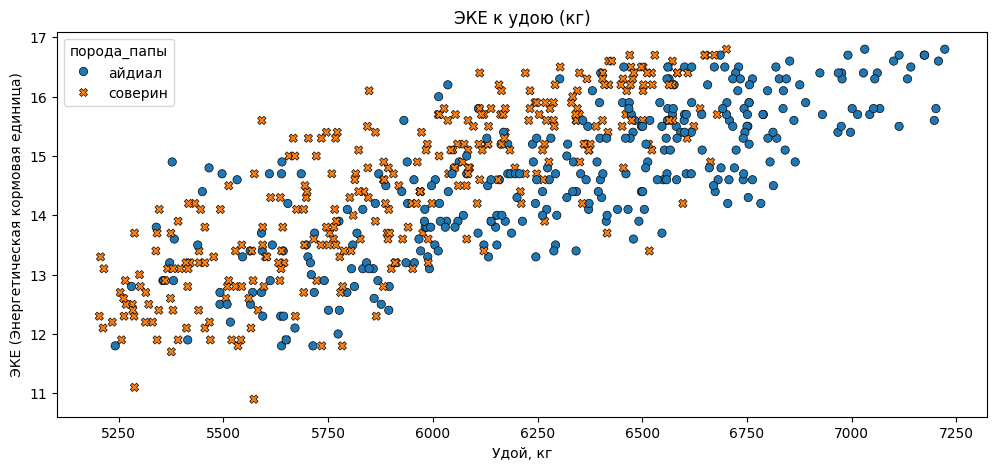

In [45]:
scatter_ferma_cat(ferma_main_df, 'порода_папы', 'ЭКЕ (Энергетическая кормовая единица)')

- Коровы, произошедшие от коров породы "айдиал" приносят больше молока.
- Корреляция точно есть.

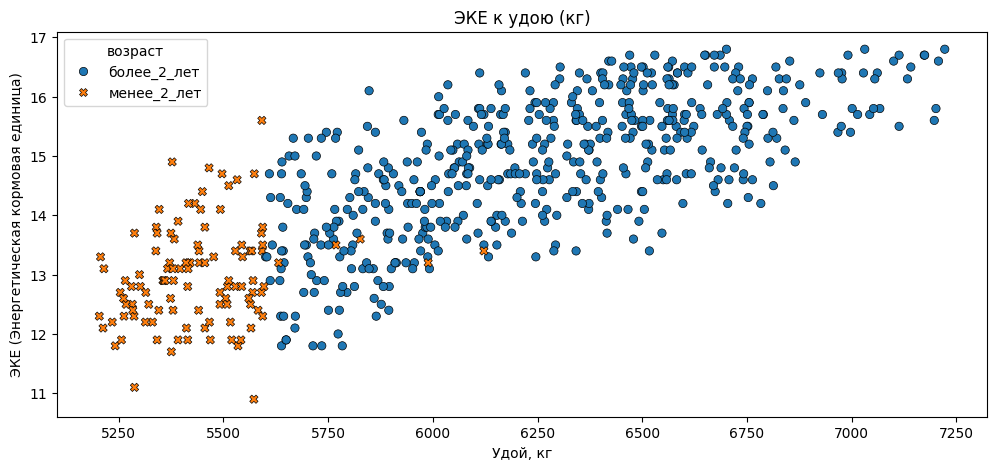

In [46]:
scatter_ferma_cat(ferma_main_df, 'возраст', 'ЭКЕ (Энергетическая кормовая единица)')

- Возраст коровы сильно сказывается на объеме годового удоя - взрослые коровы приносят сильно больше молока, чем молодые. Однако, некоторые молодые коровы приносят тоже досточно много молока (> 6000), но их единицы.
- Корреляция сильная.

### Вывод по корреляционному анализу данных

1. Корреляционная матрица
- Сильные положительные корреляции:
   Признаки "удой_кг" и "эке" имеют сильные положительные корреляции с другими признаками, что указывает на то, что увеличение одного из этих признаков связано с увеличением других. Признаки "сырой_протеин_г", "спо" и "жирность_прц" также демонстрируют сильные положительные корреляции, что может указывать на взаимосвязь между изменениями в их содержании.
- Умеренные положительные корреляции:
   Признаки "сырой_протеин_г", "жирность_прц" и "белок_прц" имеют умеренные положительные корреляции между собой и с другими признаками, что указывает на определенную взаимозависимость, но менее выраженную, чем в случае сильных корреляций.
- Отсутствие корреляции:
   Признак "белок_прц" имеет лишь одну сильную положительную корреляцию с "сырой_протеин_г", в остальных случаях не демонстрирует заметных взаимосвязей. Это может указывать на независимость содержания белка от других показателей.
  
- Согласно матрице корреляций, **мультиколлинеарность** не наблюдается ни в одной паре.

2. Визуализация данных
- Для количественных значений по отношению к целевому принзнаку `удой_кг`.
  
1. **ЭКЕ**: Явный возрастающий тренд, положительная линейная зависимость — чем больше ЭКЕ, тем больше удой.
2. **Сырой протеин**: Более широкий, но все равно возрастающий график, положительная линейная зависимость.
3. **СПО**: Наличие корреляции, положительная линейная зависимость.
4. **Жирность**: Также наблюдается положительная линейная зависимость — с увеличением удоя увеличивается и жирность.
5. **Белок**: Корреляция отсутствует.


- Для категориальных значений по отношению к целевому принзнаку `удой_кг`.

1. **Порода**: Значения равномерно распределены, корреляции нет.
2. **Тип пастбища**: Корреляция между типом пастбища и удоем наблюдается; холмистые пастбища показывают более высокий удой.
3. **Порода папы**: Коровы от "Айдиал" показывают лучший удой, указывая на наличие корреляции.
4. **Возраст**: Сильная корреляция — взрослые коровы дают больше молока.

3. Обобщая
- **Сильные положительные корреляции** между `удоем`, `ЭКЕ` и `спо` свидетельствуют о том, что улучшение кормления и других факторов может привести к увеличению удоя.
- **Умеренные корреляции** показывают, что хотя некоторые показатели также связаны, их влияние менее выражено.
- **Отсутствие корреляции** у `белок_прц` может указывать на то, что факторы, влияющие на содержание белка в молоке, отличаются от факторов, влияющих на другие показатели.
- **Категориальные признаки** показывают, что условия содержания и генетика (порода коровы и порода ее папы) играют важную роль в показателях удоя, в то время как возраст коровы имеет наибольшее влияние на продуктивность.

## Задача регрессии

In [47]:
def residue_analysis(residuals, predictions):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals, bins=60, color='gold', edgecolor='black', alpha=0.5)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(predictions, residuals, color='gold', edgecolor='black', alpha=0.5)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()

### Первая модель

#### Подготовка данных

In [48]:
RANDOM_STATE = 42
X = ferma_main_df[['эке', 'сырой_протеин_г', 'спо', 'тип_пастбища', 'порода', 'порода_папы', 'возраст']]
y = ferma_main_df['удой_кг']

- Создана константа
- Выделены в отдельные переменные целевой признак и входные признаки.

Входные признаки были отобраны следующим образом:
- Показатели корма: могут влиять на удой.
- Возраст: более взрослые коровы могут давать больший удой.
- Тип пастбища и порода: могут влиять на продуктивность коровы.

#### Разделение данных

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(474, 7)

(159, 7)

(474,)

(159,)

- Данные разделены на тренировочные и тестовые, зафиксирован random_state

#### Кодирование и масштабирование данных

In [50]:
# кодирование категориальных признаков
cat_col_names = ['тип_пастбища', 'порода', 'порода_папы', 'возраст']
encoder = OneHotEncoder(drop='first', sparse_output=False)

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_ohe.head()

,тип_пастбища_холмистое,порода_соверин,порода_папы_соверин,возраст_менее_2_лет
0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,1.0
2,0.0,0.0,1.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0


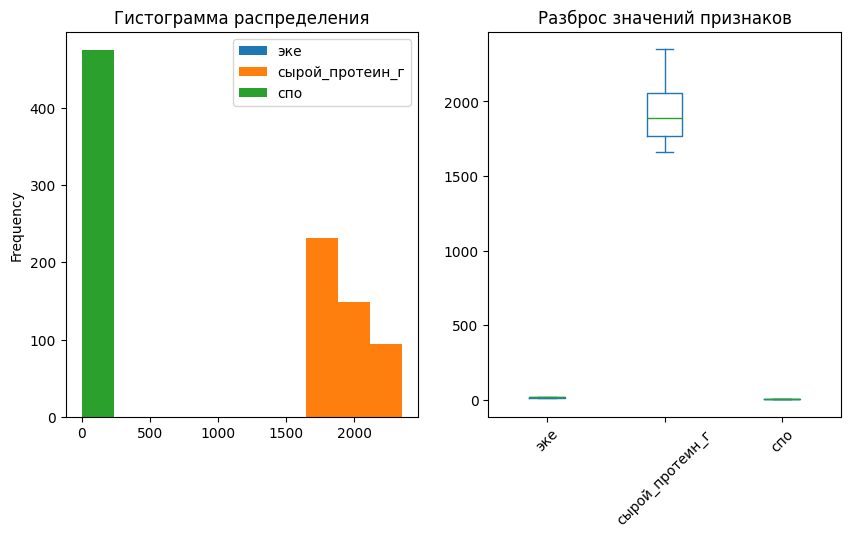

In [51]:
# оценка масштаба данных
num_col_names = ['эке', 'сырой_протеин_г', 'спо']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Разброс очень большой, масштабироание точно нужно.

,эке,сырой_протеин_г,спо
0,0.830185,-0.749938,0.548257
1,-1.075235,-1.003408,-2.224553
2,-0.999019,1.140071,-1.608372
3,-0.236851,1.173133,-0.684103
4,-1.380103,-1.174226,-0.684103


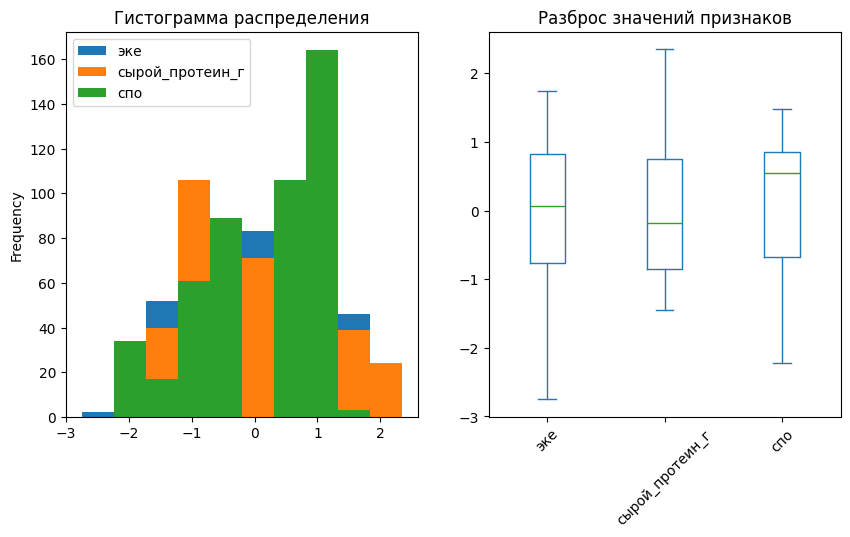

In [52]:
# масштабирование количественных признаков
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

display(X_train_scaled[:5])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
X_train_scaled.plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train_scaled.plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Данные успешно приведены к одному масштабу, хоть и не идеально.

In [53]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

X_train.head()

,тип_пастбища_холмистое,порода_соверин,порода_папы_соверин,возраст_менее_2_лет,эке,сырой_протеин_г,спо
0,1.0,0.0,1.0,0.0,0.830185,-0.749938,0.548257
1,0.0,1.0,1.0,1.0,-1.075235,-1.003408,-2.224553
2,0.0,0.0,1.0,1.0,-0.999019,1.140071,-1.608372
3,0.0,0.0,1.0,0.0,-0.236851,1.173133,-0.684103
4,0.0,0.0,0.0,0.0,-1.380103,-1.174226,-0.684103


#### Обучение и оценка качества модели

In [54]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

Модель успешно обучена.

In [55]:
# коэффициент детерминации
r2 = r2_score(y_test, predictions)
r2

0.7526890132316821

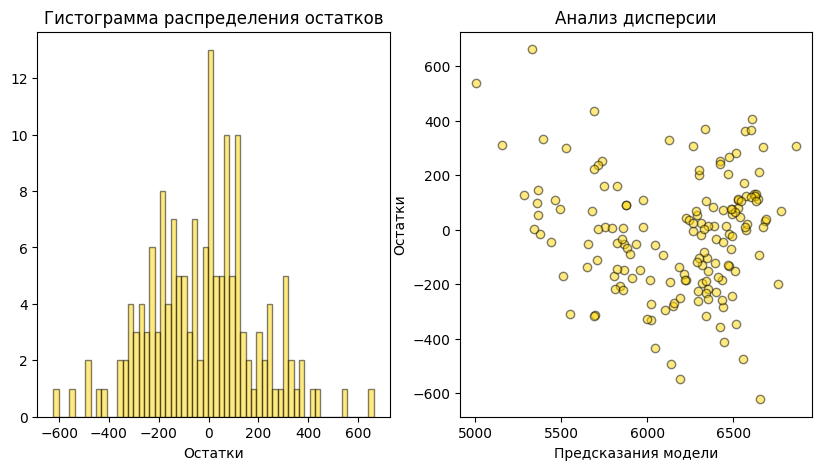

In [56]:
# анализ остатков
residuals = y_test - predictions

residue_analysis(residuals, predictions)

#### Вывод по первой модели

1. Значение R2 - 0.75 значит, что модель объясняет 75% изменений в зависимой переменной.
2. Гистограмма:
  - Гистограмма имеет симметричное нормальное распределение.
  - Можно заметить выбросы около -200.

3. Дисперсия:
  - Анализ дисперсии показывает не очень хорошие результаты - согласно ему, модель чаще ошибается на больших значениях (> 6000).
  - Диаграмма напоминает клин(<) (так называемый рупор).


4. В целом, модель показывает себя не очень хорошо и ей нужны доработки.
  - Исправить ситуацию может помочь:
    1. Добавление дополнительных признаков в модель.
    2. Трансформация данных для изменения взаимосвязей входных признаков с целевыми.

### Вторая модель

#### Подготовка данных

In [57]:
# спо и удой связаны нелинейно, 
# исправлю это преобразованием в бинарный признак
display(ferma_main_df.query('спо == 0.91'))
ferma_main_df['спо_бин'] = ferma_main_df['спо'].apply(lambda x: 'больше 0.91' if x >= 0.91 else 'меньше 0.91')

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы,жирность_прц,белок_прц,вкус,возраст


In [58]:
ferma_main_df.tail()

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы,жирность_прц,белок_прц,вкус,возраст,спо_бин
629,627,5970,14.4,1837,0.88,соверин,холмистое,соверин,3.64,3.075,не вкусно,более_2_лет,меньше 0.91
630,627,5970,14.4,1837,0.88,соверин,холмистое,соверин,3.64,3.075,не вкусно,более_2_лет,меньше 0.91
631,627,5970,14.4,1837,0.88,соверин,холмистое,соверин,3.64,3.075,не вкусно,более_2_лет,меньше 0.91
632,627,5970,14.4,1837,0.88,соверин,холмистое,соверин,3.64,3.075,не вкусно,более_2_лет,меньше 0.91
633,627,5970,14.4,1837,0.88,соверин,холмистое,соверин,3.64,3.075,не вкусно,более_2_лет,меньше 0.91


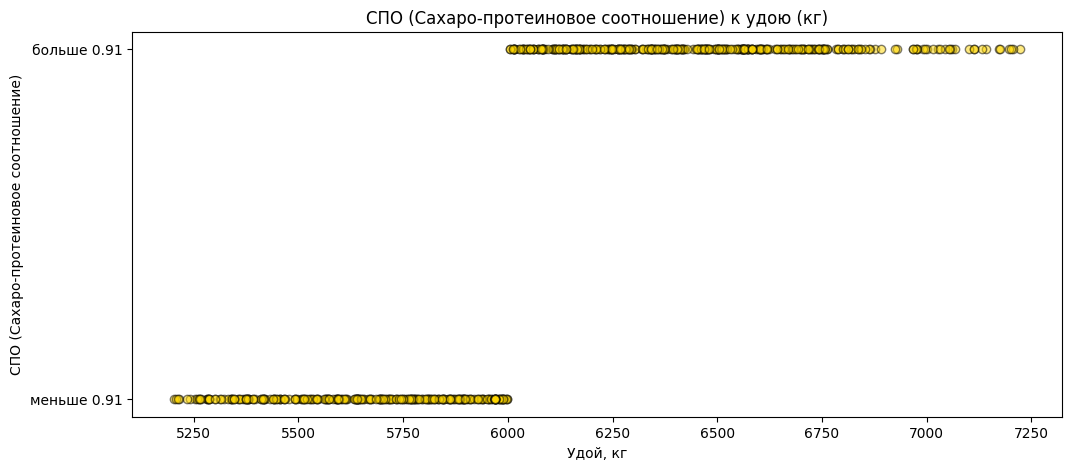

In [59]:
scatter_ferma(ferma_main_df, 'спо_бин', 'СПО (Сахаро-протеиновое соотношение)')

- Теперь все значения меньше 0.91 будут равны 0, а больше - 1.

In [60]:
# эке и удой также связаны нелинейно.
ferma_main_df['эке2'] = ferma_main_df['эке'] * ferma_main_df['эке']
ferma_main_df.head()

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы,жирность_прц,белок_прц,вкус,возраст,спо_бин,эке2
0,1,5863,14.2,1743,0.890,айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,меньше 0.91,201.639999
1,2,5529,12.8,2138,0.890,айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,меньше 0.91,163.840012
2,3,5810,14.0,1854,0.885,соверин,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,меньше 0.91,196.000000
3,4,5895,12.4,2012,0.885,соверин,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,меньше 0.91,153.759995
4,5,5302,12.8,1675,0.885,айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,меньше 0.91,163.840012


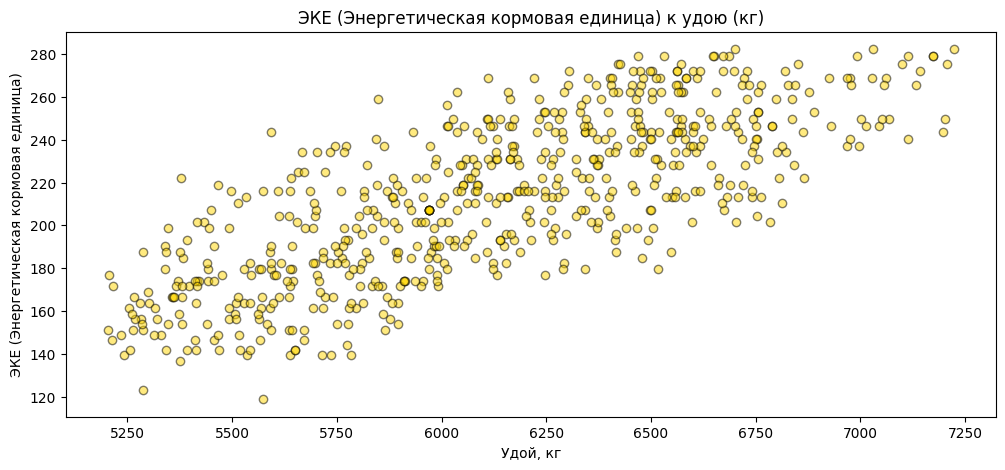

In [61]:
scatter_ferma(ferma_main_df, 'эке2', 'ЭКЕ (Энергетическая кормовая единица)')

Возведение значений "эке" в квадрат позволило получить линейную зависимость "эке" к удою.

In [62]:
X = ferma_main_df[['эке2', 'сырой_протеин_г', 'спо_бин', 'тип_пастбища', 'порода', 'порода_папы', 'возраст']]
y = ferma_main_df['удой_кг']

#### Разделение данных

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(474, 7)

(159, 7)

(474,)

(159,)

#### Кодирование и масштабирование данных

In [64]:
cat_col_names = ['тип_пастбища', 'порода', 'порода_папы', 'возраст', 'спо_бин']

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_ohe.head()

,тип_пастбища_холмистое,порода_соверин,порода_папы_соверин,возраст_менее_2_лет,спо_бин_меньше 0.91
0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,1.0,1.0
2,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0


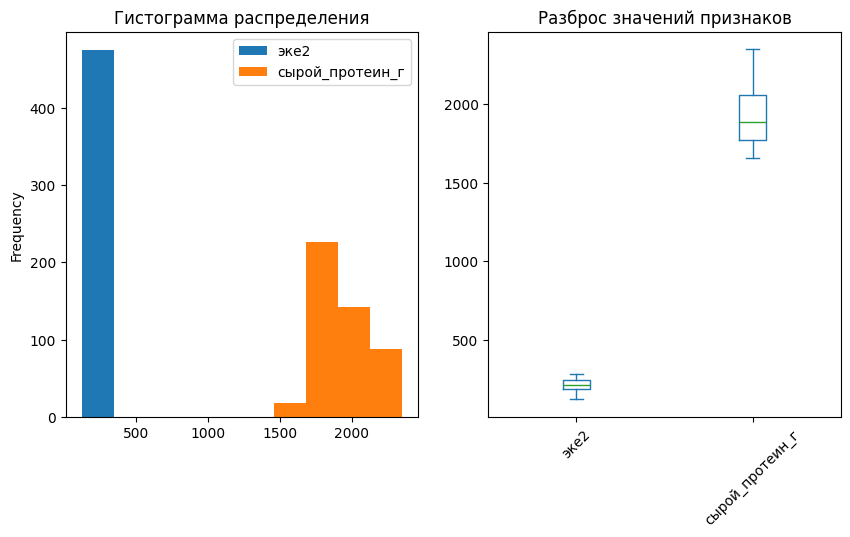

In [65]:
# оценка масштаба новых данных
num_col_names = ['эке2', 'сырой_протеин_г']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

,эке2,сырой_протеин_г
0,0.825189,-0.749938
1,-1.080029,-1.003408
2,-1.010194,1.140071
3,-0.282626,1.173133
4,-1.354062,-1.174226


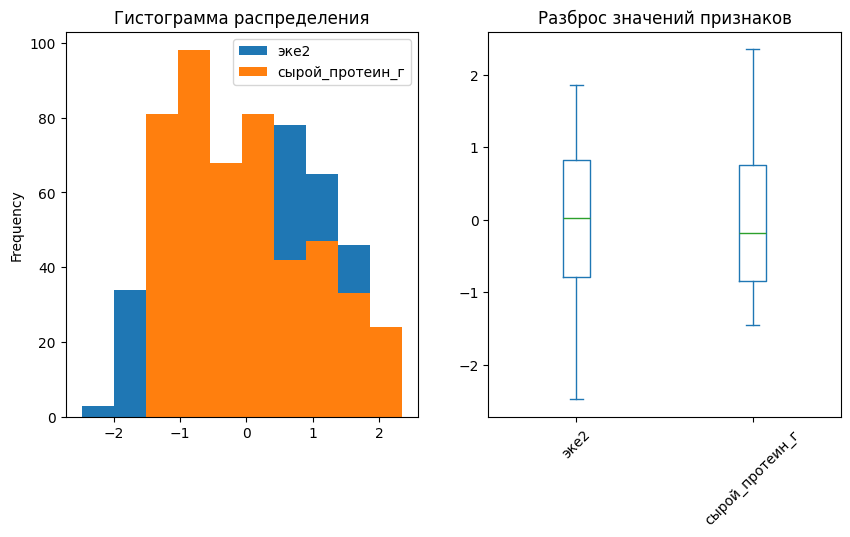

In [66]:
# масштабирование количественных признаков
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

display(X_train_scaled[:5])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
X_train_scaled.plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train_scaled.plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Все хорошо.

In [67]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

X_train.head()

,тип_пастбища_холмистое,порода_соверин,порода_папы_соверин,возраст_менее_2_лет,спо_бин_меньше 0.91,эке2,сырой_протеин_г
0,1.0,0.0,1.0,0.0,0.0,0.825189,-0.749938
1,0.0,1.0,1.0,1.0,1.0,-1.080029,-1.003408
2,0.0,0.0,1.0,1.0,1.0,-1.010194,1.140071
3,0.0,0.0,1.0,0.0,1.0,-0.282626,1.173133
4,0.0,0.0,0.0,0.0,1.0,-1.354062,-1.174226


#### Обучение и оценка качества модели

In [68]:
model_lr.fit(X_train, y_train)
predictions2 = model_lr.predict(X_test)

In [69]:
# коэффициент детерминации
r2_2 = r2_score(y_test, predictions2)
r2_2

0.7903877865613624

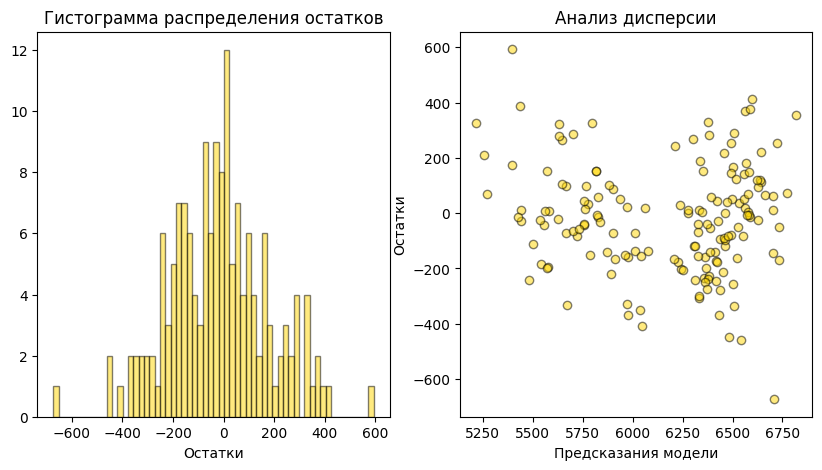

In [70]:
# анализ остатков
residuals2 = y_test - predictions2

residue_analysis(residuals2, predictions2)

#### Вывод по второй модели

1. Значение R2 - 0.79 значит, что модель объясняет 79% изменений в зависимой переменной. Это лучше, чем в случае с первой моделью.
   
2. Гистограмма:
  - Гистограмма имеет симметричное нормальное распределение.
  - Можно заметить выбросы около -200 и +300.

3. Дисперсия:
  - Анализ дисперсии показывает все еще не очень хорошие результаты - согласно ему, модель стала точнее первой и дисперсия стала более случайной.
  - Диаграмма уже не напоминает клин(<) (так называемый рупор).


4. В целом, модель на обновленных данных стала показывать себя лучше, однако ей все еще нужны доработки.
  - Еще сильнее улучшить ситуацию может помочь:
    1. Добавление дополнительных признаков в модель.
    2. Трансформация данных для изменения взаимосвязей входных признаков с целевыми.

### Третья модель

#### Объединение таблиц

In [71]:
ferma_main_dad = ferma_main_df.merge(ferma_dad_df, on='id', how='left')
ferma_main_dad.head()

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы,жирность_прц,белок_прц,вкус,возраст,спо_бин,эке2,имя_папы
0,1,5863,14.2,1743,0.890,айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет,меньше 0.91,201.639999,Буйный
1,2,5529,12.8,2138,0.890,айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет,меньше 0.91,163.840012,Соловчик
2,3,5810,14.0,1854,0.885,соверин,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет,меньше 0.91,196.000000,Барин
3,4,5895,12.4,2012,0.885,соверин,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет,меньше 0.91,153.759995,Буйный
4,5,5302,12.8,1675,0.885,айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет,меньше 0.91,163.840012,Барин


Объединение прошло успешно.

In [72]:
X = ferma_main_dad[['эке2', 'сырой_протеин_г', 'спо_бин', 'тип_пастбища', 'порода', 'порода_папы', 'возраст', 'имя_папы']]
y = ferma_main_dad['удой_кг']

#### Разделение данных

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(474, 8)

(159, 8)

(474,)

(159,)

#### Кодирование и масштабирование данных

In [74]:
cat_col_names = ['тип_пастбища', 'порода', 'порода_папы', 'возраст', 'спо_бин', 'имя_папы']

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_ohe.head()

,тип_пастбища_холмистое,порода_соверин,порода_папы_соверин,возраст_менее_2_лет,спо_бин_меньше 0.91,имя_папы_Буйный,имя_папы_Геркулес,имя_папы_Соловчик
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


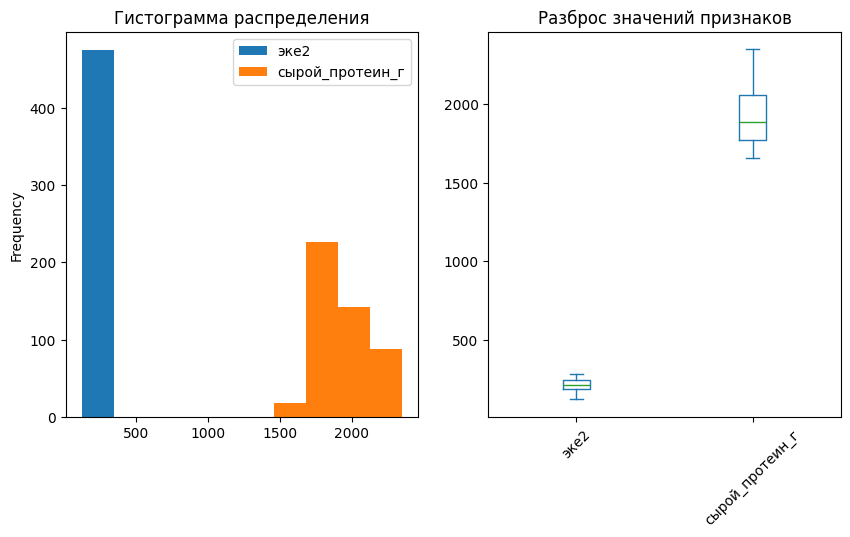

In [75]:
# оценка масштаба данных
num_col_names = ['эке2', 'сырой_протеин_г']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

,эке2,сырой_протеин_г
0,0.825189,-0.749938
1,-1.080029,-1.003408
2,-1.010194,1.140071
3,-0.282626,1.173133
4,-1.354062,-1.174226


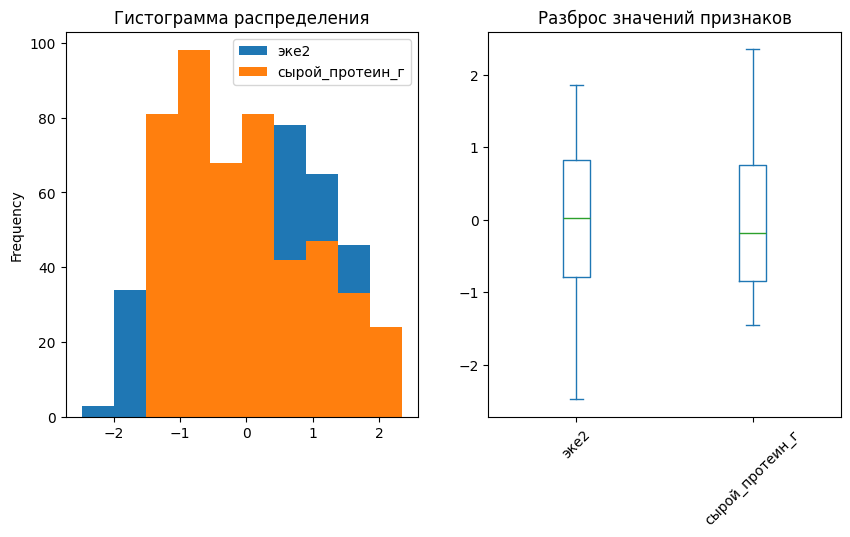

In [76]:
# масштабирование количественных признаков
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

display(X_train_scaled[:5])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
X_train_scaled.plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train_scaled.plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [77]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

X_train.head()

,тип_пастбища_холмистое,порода_соверин,порода_папы_соверин,возраст_менее_2_лет,спо_бин_меньше 0.91,имя_папы_Буйный,имя_папы_Геркулес,имя_папы_Соловчик,эке2,сырой_протеин_г
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.825189,-0.749938
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.080029,-1.003408
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,-1.010194,1.140071
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.282626,1.173133
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.354062,-1.174226


#### Обучение и оценка качества модели

In [78]:
model_lr.fit(X_train, y_train)
predictions3 = model_lr.predict(X_test)

In [79]:
# коэффициент детерминации
r2_3 = r2_score(y_test, predictions3)
r2_3

0.8023577346643574

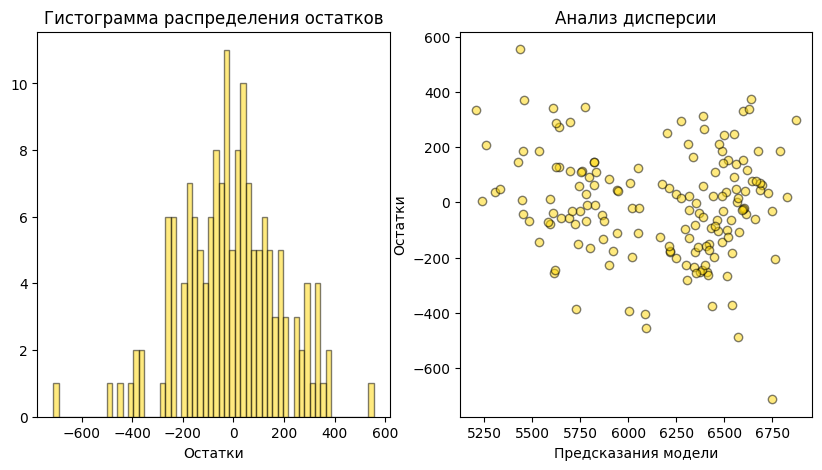

In [80]:
# анализ остатков
residuals3 = y_test - predictions3

residue_analysis(residuals3, predictions3)

#### Вывод по третьей модели

1. Значение R2 - 0.8023... значит, что модель объясняет 80% изменений в зависимой переменной. Это лучше, чем в случае со второй моделью.
   
2. Гистограмма:
  - Гистограмма имеет симметричное нормальное распределение.
  - Данные распределены ровнее.

3. Дисперсия:
  - Анализ дисперсии показывает хорошие результаты - согласно ему, модель стала точнее второй и дисперсия стала еще более случайной.
  - Диаграмма выглядит случайной, модель ошибается как на больших, так и на малых значениях.


4. В целом, модель после добавления имени папы и с обновленными данными стала показывать себя хорошо.


  - По прежнему, еще улучшить ситуацию может помочь:
    1. Добавление дополнительных признаков в модель.

### Сравнение моделей

In [81]:
r2_scores = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'R2': [r2, r2_2, r2_3]
})
r2_scores.T

,0,1,2
Model,Model 1,Model 2,Model 3
R2,0.752689,0.790388,0.802358


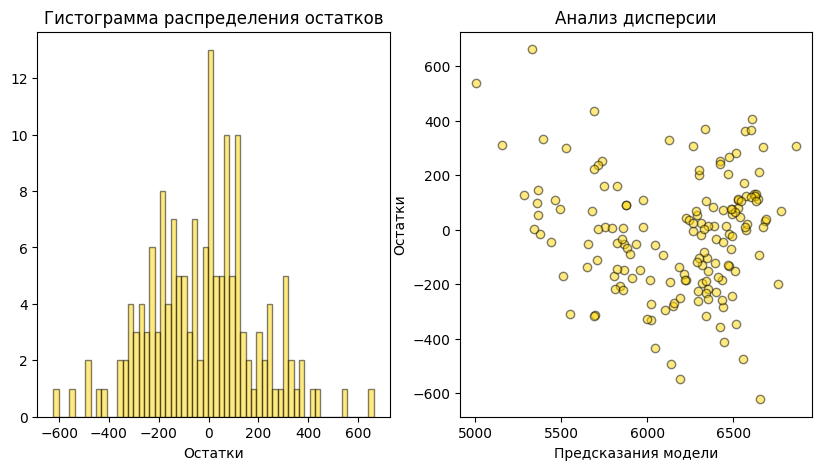

None

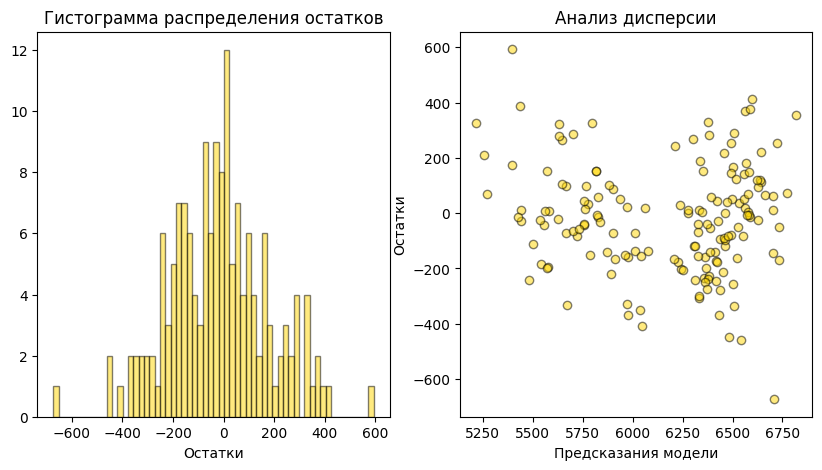

None

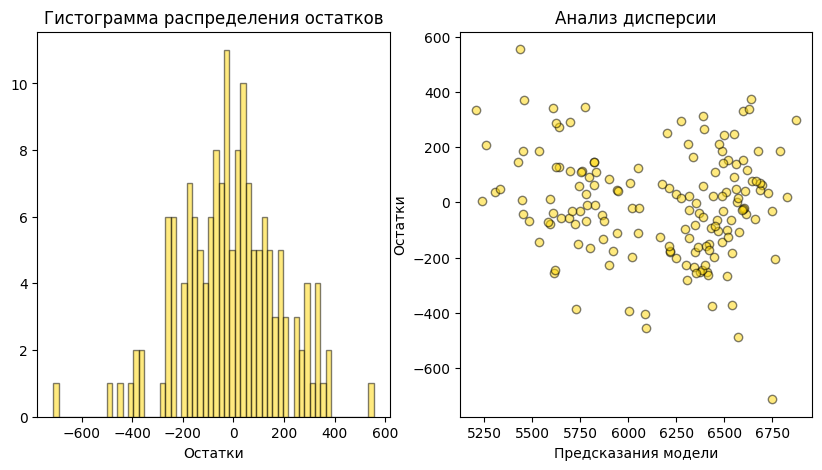

In [82]:
display(residue_analysis(residuals, predictions))
display(residue_analysis(residuals2, predictions2))
residue_analysis(residuals3, predictions3)

- При сопоставлении всех значений, очень наглядно видно, что третья модель лучше первых двух и по коэффициенту детерминации и по гистограмме и по диаграмме. 

### Оценка качества моделей

#### Метрики

In [83]:
def model_quality(y_test, predictions, number):
    mse = mean_squared_error(y_test, predictions)
    rmse = root_mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    model_quality = pd.DataFrame({
     'metrics': [f'mse_{number}', f'rmse_{number}', f'mae_{number}'],
     'values': [mse, rmse, mae]})
    display(model_quality.T)

In [84]:
metrics_1 = model_quality(y_test, predictions, 1)
metrics_2 = model_quality(y_test, predictions2, 2)
metrics_3 = model_quality(y_test, predictions3, 3)

,0,1,2
metrics,mse_1,rmse_1,mae_1
values,46380.326655,215.360922,169.068706


,0,1,2
metrics,mse_2,rmse_2,mae_2
values,39310.35599,198.268394,153.907281


,0,1,2
metrics,mse_3,rmse_3,mae_3
values,37065.530112,192.524103,148.842324


1. **Первая модель** имеет наивысшее значение среднеквадратичной ошибки (MSE) среди всех трех моделей, что указывает на то, что предсказания этой модели имеют наибольшие отклонения от истинных значений. RMSE также самое высокое, что подтверждает значительное расхождение предсказаний. MAE показывает, что в среднем предсказания отклоняются от истинных значений на 164.24.
2. **Вторая модель** демонстрирует улучшение по сравнению с первой, с меньшими значениями MSE, RMSE и MAE. Это говорит о том, что предсказания этой модели более точны и имеют меньшее отклонение от фактических значений.
3. **Третья модель** имеет наименьшие значения MSE, RMSE и MAE среди всех трех моделей, что указывает на наилучшее качество предсказаний. Это говорит о том, что третья модель лучше всего справляется с задачей предсказания, обеспечивая наименьшие ошибки.

#### Доверительный интервал

In [85]:
def confidence_interval(predictions):
    #определение доверительного интервала
    confidence_interval = st.norm.interval(
        confidence=0.95,
        loc=np.mean(predictions), 
        scale=st.sem(predictions)
    )
    print(f'95% доверительный интервал прогноза: {confidence_interval}')

In [86]:
confidence_interval(predictions)
confidence_interval(predictions2)
confidence_interval(predictions3)

95% доверительный интервал прогноза: (6111.471156080302, 6235.11406695634)
95% доверительный интервал прогноза: (6107.528481497046, 6233.892580804982)
95% доверительный интервал прогноза: (6095.653015185804, 6225.769679299989)


1. Доверительный интервал первой модели:
  - **Нижняя граница**: 6111.47
  - **Верхняя граница**: 6235.11
- Это означает, что с 95% вероятностью истинное значение прогноза окажется в диапазоне от 6111.47 до 6235.11.

2. Доверительный интервал второй модели:
  - **Нижняя граница**: 6107.53
  - **Верхняя граница**: 6233.89  
- Это также означает, что с 95% вероятностью истинное значение прогноза будет находиться в этом диапазоне.

3. Доверительный интервал третьей модели:
  - **Нижняя граница**: 6095.65
  - **Верхняя граница**: 6225.77  
- Это также означает, что с 95% вероятностью истинное значение прогноза будет находиться в этом диапазоне.

#### Вывод по оценке качества моделей
- Третья модель показала себя лучше других во всех тестах, значит она наиболее успешно предсказывает верные результаты.

### Прогноз удоя коров

#### Добавление новых признаков

In [87]:
cow_buy_df['эке'] = ferma_main_df['эке'].mean() * 1.05
cow_buy_df['сырой_протеин_г'] = ferma_main_df['сырой_протеин_г'].mean() * 1.05
cow_buy_df['спо'] = ferma_main_df['спо'].mean() * 1.05

cow_buy_df.head()

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность_прц,текущий_белок_прц,возраст,эке,сырой_протеин_г,спо
0,айдиал,холмистое,айдиал,Геркулес,3.58,3.076,более_2_лет,15.27493,2019.227962,0.958469
1,айдиал,равнинное,соверин,Буйный,3.54,3.081,менее_2_лет,15.27493,2019.227962,0.958469
2,соверин,равнинное,соверин,Барин,3.59,3.074,более_2_лет,15.27493,2019.227962,0.958469
3,соверин,холмистое,айдиал,Буйный,3.40,3.061,более_2_лет,15.27493,2019.227962,0.958469
4,айдиал,равнинное,соверин,Буйный,3.64,3.074,более_2_лет,15.27493,2019.227962,0.958469


#### Подготовка данных

In [88]:
cat_col_names = ['тип_пастбища', 'порода', 'порода_папы', 'возраст', 'спо_бин', 'имя_папы']
num_col_names = ['эке2', 'сырой_протеин_г']

cow_buy_df['спо_бин'] = cow_buy_df['спо'].apply(lambda x: 'больше 0.91' if x >= 0.91 else 'меньше 0.91')

In [89]:
cow_buy_df['эке2'] = cow_buy_df['эке'] * cow_buy_df['эке']
cow_buy_df.head()

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность_прц,текущий_белок_прц,возраст,эке,сырой_протеин_г,спо,спо_бин,эке2
0,айдиал,холмистое,айдиал,Геркулес,3.58,3.076,более_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478
1,айдиал,равнинное,соверин,Буйный,3.54,3.081,менее_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478
2,соверин,равнинное,соверин,Барин,3.59,3.074,более_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478
3,соверин,холмистое,айдиал,Буйный,3.40,3.061,более_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478
4,айдиал,равнинное,соверин,Буйный,3.64,3.074,более_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478


#### Кодирование и масштабирование данных

In [90]:
cow_buy_ohe = encoder.transform(cow_buy_df[cat_col_names])
cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)

cow_buy_ohe 

,тип_пастбища_холмистое,порода_соверин,порода_папы_соверин,возраст_менее_2_лет,спо_бин_меньше 0.91,имя_папы_Буйный,имя_папы_Геркулес,имя_папы_Соловчик
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
6,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [91]:
cow_buy_scaled = scaler.transform(cow_buy_df[num_col_names])
cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)

In [92]:
cow_buy_res = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)

#### Прогнозирование

In [93]:
cow_buy_df['предсказание_удоя_кг'] = model_lr.predict(cow_buy_res)
cow_buy_df[['порода', 'тип_пастбища', 'возраст', 'предсказание_удоя_кг']]

,порода,тип_пастбища,возраст,предсказание_удоя_кг
0,айдиал,холмистое,более_2_лет,6601.209037
1,айдиал,равнинное,менее_2_лет,6349.834806
2,соверин,равнинное,более_2_лет,6289.428470
3,соверин,холмистое,более_2_лет,6604.211601
4,айдиал,равнинное,более_2_лет,6569.661428
5,соверин,равнинное,менее_2_лет,6388.190078
6,айдиал,холмистое,более_2_лет,6639.921575
7,айдиал,равнинное,более_2_лет,6530.948890
8,соверин,равнинное,более_2_лет,6250.715932
9,айдиал,холмистое,менее_2_лет,6402.418599


### Вывод по задаче регрессии

Третья модель сделала предсказания по годовому удою коров. Согласно предсказаниям, все коровы из предлагаемых, будут давать более 6000 кг. в год. Это отличные показатели.


**1. Первая модель**
- **Коэффициент детерминации (R²)**: Значение R2 - 0.75 значит, что модель объясняет 75% изменений в зависимой переменной..
- **Гистограмма остатков**: имеет симметричное нормальное распределение, но присутствуют выбросы.
- **Анализ дисперсии**: показывает, что модель чаще ошибается на больших значениях удоя. Это указывает на необходимость улучшений.

**2. Вторая модель**
- **Коэффициент детерминации (R²)**: 0.79. Модель стала более точной по сравнению с первой.
- **Гистограмма остатков**: также имеет нормальное распределение, однако остались выбросы.
- **Анализ дисперсии**: улучшился по сравнению с первой моделью, но всё ещё требует доработки.

**3. Третья модель**
- **Коэффициент детерминации (R²)**: 0.8. Это лучший результат среди всех моделей.
- **Гистограмма остатков**: показывает более равномерное распределение, что указывает на улучшение качества предсказаний.
- **Анализ дисперсии**: показывает случайное распределение, что является положительным признаком.

**4. Сравнение моделей**
- **R²**: третья модель (0.825) лучше первой (0.784) и второй (0.818).
- **Метрики качества** (MSE, RMSE, MAE) показывают, что третья модель также превосходит две другие по всем критериям, что подтверждает её наилучшее качество предсказаний.

**5. Доверительный интервал**
- Доверительные интервалы для предсказаний с каждой моделью показывают, что третья модель имеет узкий диапазон значений, что говорит о меньшей неопределенности в предсказаниях.

**6. Прогнозирование**
- Результаты прогнозирования показывают высокую точность и дают возможность делать обоснованные выводы на основе третьей модели.

**7. Заключение**
Третья модель показала наилучшие результаты во всех аспектах анализа и успешно предсказала показатели удоя для коров, рассматриваемых к покупке.

## Задача классификации

### Обучение модели логистической регрессии

#### Подготовка данных

In [94]:
X = ferma_main_dad[['удой_кг', 'сырой_протеин_г', 'порода', 'тип_пастбища', 'порода_папы', 'жирность_прц', 'белок_прц',	'возраст', 'спо_бин', 'эке2']]
y = ferma_main_dad['вкус'].apply(lambda x: 1 if x == 'вкусно' else 0)
y.head()

0    1
1    1
2    0
3    0
4    1
Name: вкус, dtype: int64

#### Разделение данных

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(474, 10)

(159, 10)

(474,)

(159,)

#### Кодирование и масштабирование данных

In [96]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'спо_бин']

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_ohe.head()

,порода_соверин,тип_пастбища_холмистое,порода_папы_соверин,возраст_менее_2_лет,спо_бин_меньше 0.91
0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,1.0,1.0,1.0
2,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0


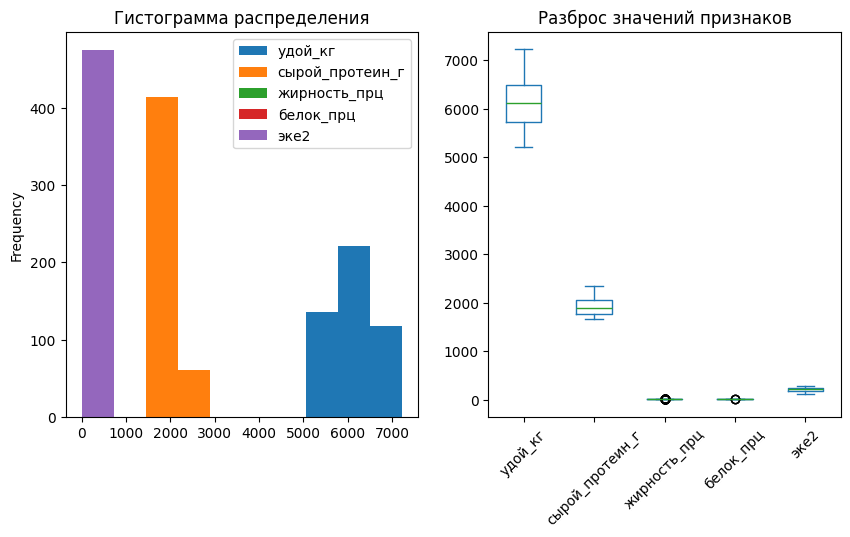

In [97]:
# оценка масштаба данных
num_col_names = ['удой_кг', 'сырой_протеин_г', 'жирность_прц', 'белок_прц', 'эке2']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

,удой_кг,сырой_протеин_г,жирность_прц,белок_прц,эке2
0,0.594406,-0.749938,0.757125,0.508245,0.825189
1,-1.852238,-1.003408,-2.599149,-2.307207,-1.080029
2,-1.383469,1.140071,0.085869,0.106065,-1.010194
3,-0.341075,1.173133,-0.097200,-0.296115,-0.282626
4,-0.820124,-1.174226,0.024846,-1.100571,-1.354062


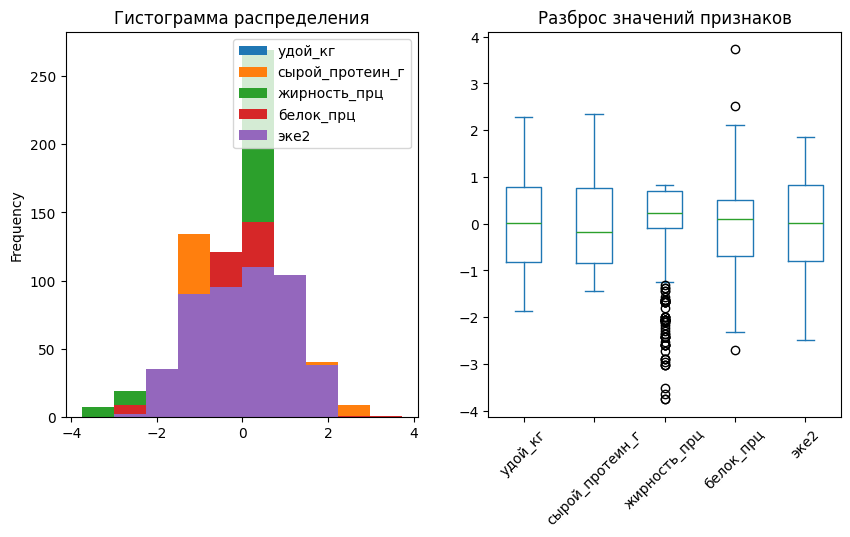

In [98]:
# масштабирование количественных признаков
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

display(X_train_scaled[:5])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
X_train_scaled.plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train_scaled.plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [99]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

X_train.head()

,порода_соверин,тип_пастбища_холмистое,порода_папы_соверин,возраст_менее_2_лет,спо_бин_меньше 0.91,удой_кг,сырой_протеин_г,жирность_прц,белок_прц,эке2
0,0.0,1.0,1.0,0.0,0.0,0.594406,-0.749938,0.757125,0.508245,0.825189
1,1.0,0.0,1.0,1.0,1.0,-1.852238,-1.003408,-2.599149,-2.307207,-1.080029
2,0.0,0.0,1.0,1.0,1.0,-1.383469,1.140071,0.085869,0.106065,-1.010194
3,0.0,0.0,1.0,0.0,1.0,-0.341075,1.173133,-0.097200,-0.296115,-0.282626
4,0.0,0.0,0.0,0.0,1.0,-0.820124,-1.174226,0.024846,-1.100571,-1.354062


#### Обучение и оценка качества модели

In [100]:
clf = LogisticRegression()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

,0,1,2
metrics,accuracy,precision,recall
values,0.616352,0.634146,0.829787


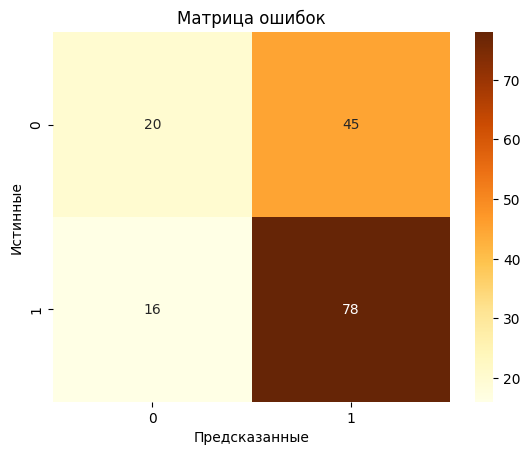

In [101]:
model_quality = pd.DataFrame({
    'metrics': [f'accuracy', f'precision', f'recall'],
    'values': [accuracy_score(y_pred, y_test), 
               precision_score(y_test, y_pred), 
               recall_score(y_test, y_pred)]
})
display(model_quality.T)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr');
plt.xlabel('Предсказанные')
plt.ylabel('Истинные')
plt.title('Матрица ошибок')
plt.show()

### Анализ модели

При покупке коров для производства молока критичнее всего ошибка первого рода, или ложные положительные, когда модель предсказывает, что коровы будут давать вкусное молоко, но на самом деле это не так. Таким образом, в данной бизнес-задаче приоритетной метрикой является precision. Фермеру важно минимизировать количество ложных положительных, чтобы гарантировать, что каждая купленная корова будет давать только вкусное молоко. Это позволяет избежать финансовых рисков и обеспечивает стабильное качество продукции.

  - Precision (точность) Высокая точность важна, потому что фермеру критически необходимо, чтобы коровы, которых он покупает, действительно давали вкусное молоко. Если модель ошибается и предсказывает, что коровы дают вкусное молоко, когда это не так, фермер рискует вложить деньги в некачественное молоко.
  - Recall (полнота) Хотя полнота важна для выявления всех случаев вкусного молока, в данном контексте она менее критична, поскольку фермер не так обеспокоен тем, сколько вкусного молока он не купит. Главное — это качество тех коров, которые будут приобретены.

В данном случае, более важной метрикой будет precision, так как нужно минимизировать количество случаев покупки коров, дающих невкусное молоко.

#### Порог классификации

In [102]:
def calculate_precision_for_thresholds(clf, X_test, y_test, thresholds):

    # получение вероятностей для положительного класса
    y_proba = clf.predict_proba(X_test)[:, 1]
    data = pd.DataFrame(zip(y_test, y_proba), columns=['y_valid', 'y_proba'])
    
    # предсказания для каждого порога
    for threshold in thresholds:
        data['y_pred_' + str(threshold)] = data['y_proba'].apply(lambda x: 1 if x >= threshold else 0)

    # Precision для каждого порога
    precision_results = {}
    for threshold in thresholds:
        precision = precision_score(data['y_valid'], data['y_pred_' + str(threshold)])
        precision_results[threshold] = precision
        print(f'y_pred_{threshold} Precision = {precision:.4f}')
    
    return precision_results

In [103]:
thresholds = [round(i, 5) for i in np.linspace(0.8099, 0.8784, num=10, endpoint=False)]
precision_results = calculate_precision_for_thresholds(clf, X_test, y_test, thresholds)

y_pred_0.8099 Precision = 0.8571
y_pred_0.81675 Precision = 1.0000
y_pred_0.8236 Precision = 1.0000
y_pred_0.83045 Precision = 1.0000
y_pred_0.8373 Precision = 1.0000
y_pred_0.84415 Precision = 1.0000
y_pred_0.851 Precision = 1.0000
y_pred_0.85785 Precision = 1.0000
y_pred_0.8647 Precision = 1.0000
y_pred_0.87155 Precision = 1.0000


Идеальный precision появляется при 0.814 и сохраняет свое значение вплоть до 0.87156.

In [104]:
y_pred_ideal_prec = (clf.predict_proba(X_test)[:, 1] >= 0.814).astype(int)
model_quality = pd.DataFrame({
    'metrics': [f'accuracy', f'precision', f'recall'],
    'values': [accuracy_score(y_pred_ideal_prec, y_test), 
               precision_score(y_test, y_pred_ideal_prec), 
               recall_score(y_test, y_pred_ideal_prec)]
})
display(model_quality.T)

,0,1,2
metrics,accuracy,precision,recall
values,0.446541,1.0,0.06383


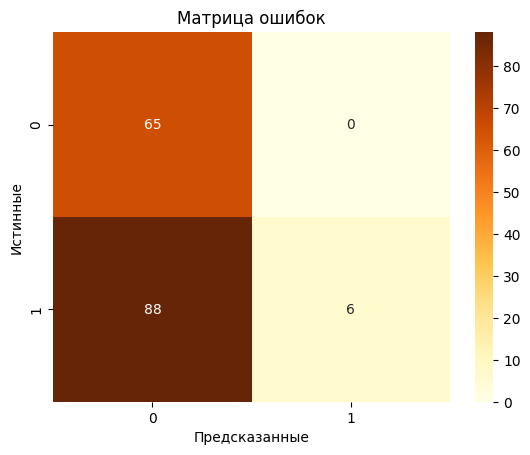

In [105]:
cm = confusion_matrix(y_test, y_pred_ideal_prec)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr');
plt.xlabel('Предсказанные')
plt.ylabel('Истинные')
plt.title('Матрица ошибок')
plt.show()

После изменения порога значение accuracy снизилось на 17. Это значит, что точность модели ниже на 17%. Однако целевой признак угадывается моделью всегда.

### Прогнозирование вкуса молока

#### Кодирование и масштабирование данных

In [106]:
cow_buy_df.head()

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность_прц,текущий_белок_прц,возраст,эке,сырой_протеин_г,спо,спо_бин,эке2,предсказание_удоя_кг
0,айдиал,холмистое,айдиал,Геркулес,3.58,3.076,более_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478,6601.209037
1,айдиал,равнинное,соверин,Буйный,3.54,3.081,менее_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478,6349.834806
2,соверин,равнинное,соверин,Барин,3.59,3.074,более_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478,6289.428470
3,соверин,холмистое,айдиал,Буйный,3.40,3.061,более_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478,6604.211601
4,айдиал,равнинное,соверин,Буйный,3.64,3.074,более_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478,6569.661428


In [107]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'спо_бин']
cow_buy_ohe = encoder.transform(cow_buy_df[cat_col_names])
cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)

cow_buy_ohe.head()
cow_buy_df.head()

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность_прц,текущий_белок_прц,возраст,эке,сырой_протеин_г,спо,спо_бин,эке2,предсказание_удоя_кг
0,айдиал,холмистое,айдиал,Геркулес,3.58,3.076,более_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478,6601.209037
1,айдиал,равнинное,соверин,Буйный,3.54,3.081,менее_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478,6349.834806
2,соверин,равнинное,соверин,Барин,3.59,3.074,более_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478,6289.428470
3,соверин,холмистое,айдиал,Буйный,3.40,3.061,более_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478,6604.211601
4,айдиал,равнинное,соверин,Буйный,3.64,3.074,более_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478,6569.661428


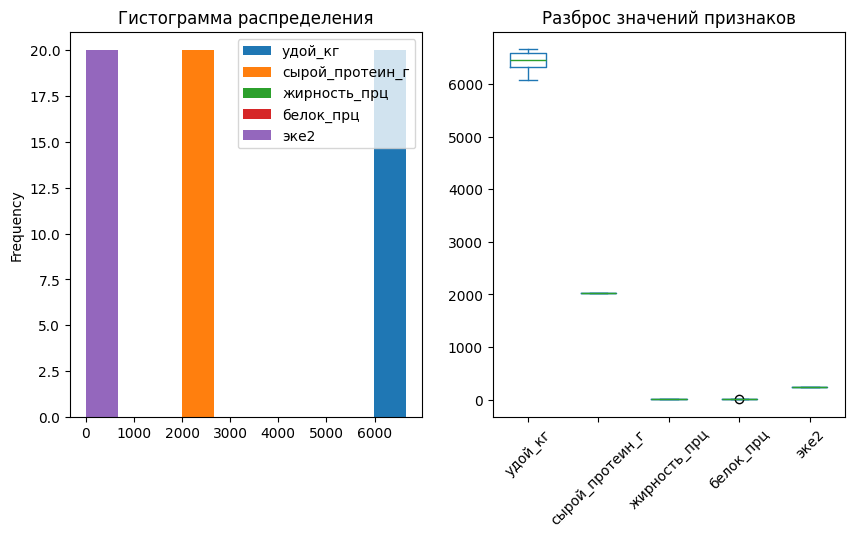

In [108]:
cow_buy_df.rename(columns={
    'предсказание_удоя_кг': 'удой_кг', 
    'текущая_жирность_прц': 'жирность_прц',
    'текущий_белок_прц': 'белок_прц'
}, inplace=True)
num_col_names = ['удой_кг', 
                 'сырой_протеин_г', 
                 'жирность_прц', 
                 'белок_прц', 
                 'эке2']
# оценка масштаба данных
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
cow_buy_df[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
cow_buy_df[num_col_names].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

,эке2,сырой_протеин_г
0,0.558684,0.529692
1,0.558684,0.529692
2,0.558684,0.529692
3,0.558684,0.529692
4,0.558684,0.529692


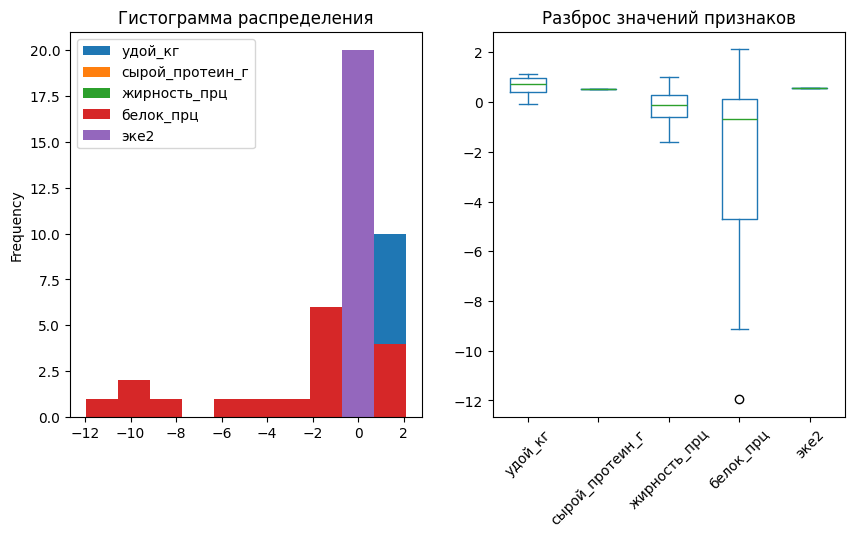

In [109]:
cow_buy_df.rename(columns={
    'предсказание_удоя_кг': 'удой_кг', 
    'текущая_жирность_прц': 'жирность_прц',
    'текущий_белок_прц': 'белок_прц'
}, inplace=True)

# масштабирование количественных признаков
cow_buy_df_scaled = scaler.transform(cow_buy_df[num_col_names])
cow_buy_df_scaled = pd.DataFrame(cow_buy_df_scaled, columns=num_col_names)

display(cow_buy_scaled[:5])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
cow_buy_df_scaled.plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
cow_buy_df_scaled.plot(kind='box', ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [110]:
cow_buy_res = pd.concat([cow_buy_ohe, cow_buy_df_scaled], axis=1)

cow_buy_res.head()

,порода_соверин,тип_пастбища_холмистое,порода_папы_соверин,возраст_менее_2_лет,спо_бин_меньше 0.91,удой_кг,сырой_протеин_г,жирность_прц,белок_прц,эке2
0,0.0,1.0,0.0,0.0,0.0,0.997813,0.529692,-0.158223,0.106065,0.558684
1,0.0,0.0,1.0,1.0,0.0,0.480986,0.529692,-0.402315,2.117157,0.558684
2,1.0,0.0,1.0,0.0,0.0,0.356791,0.529692,-0.097200,-0.698391,0.558684
3,1.0,1.0,0.0,0.0,0.0,1.003986,0.529692,-1.256639,-5.927018,0.558684
4,0.0,0.0,1.0,0.0,0.0,0.932951,0.529692,0.207917,-0.698391,0.558684


#### Прогнозирование

In [111]:
y_pred = (clf.predict_proba(cow_buy_res)[:, 1] >= 0.78261).astype(int)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

Учитывая, что в нашем случае 1 значит, что молоко вкусное, модель при пороге классификации 0.814 определила, что все коровы дают невкусное молоко.

Нужно немного смягчить требования, иначе фермер останется без молока и без коров.
При пороге 0.78261, модель нашла одну корову, которая дает вкусное молоко.

#### Дополнительная настройка порога

In [112]:
thresholds = [round(i, 5) for i in np.linspace(0.78261, 0.87652, num=10, endpoint=False)]
precision_results = calculate_precision_for_thresholds(clf, X_test, y_test, thresholds)

y_pred_0.78261 Precision = 0.9286
y_pred_0.792 Precision = 0.9091
y_pred_0.80139 Precision = 0.8750
y_pred_0.81078 Precision = 0.8571
y_pred_0.82017 Precision = 1.0000
y_pred_0.82956 Precision = 1.0000
y_pred_0.83896 Precision = 1.0000
y_pred_0.84835 Precision = 1.0000
y_pred_0.85774 Precision = 1.0000
y_pred_0.86713 Precision = 1.0000


Наивысшее значение после 1.0 достигается на пороге y_pred_0.78261 и составляет 0.9286

In [113]:
y_pred_not_ideal_prec = (clf.predict_proba(X_test)[:, 1] >= 0.78261).astype(int)
model_quality = pd.DataFrame({
    'metrics': [f'accuracy', f'precision', f'recall'],
    'values': [accuracy_score(y_pred_not_ideal_prec, y_test), 
               precision_score(y_test, y_pred_not_ideal_prec), 
               recall_score(y_test, y_pred_not_ideal_prec)]
})
display(model_quality.T)

,0,1,2
metrics,accuracy,precision,recall
values,0.484277,0.928571,0.138298


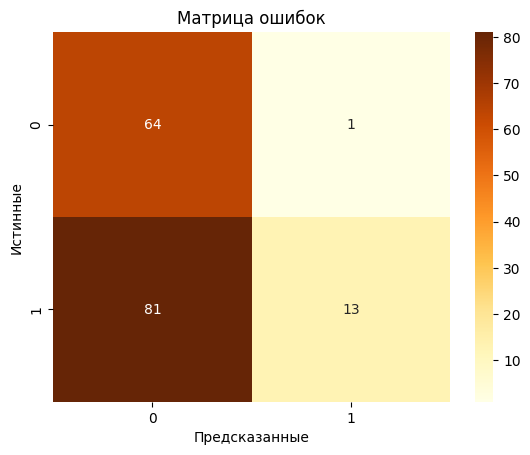

In [114]:
cm = confusion_matrix(y_test, y_pred_not_ideal_prec)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr');
plt.xlabel('Предсказанные')
plt.ylabel('Истинные')
plt.title('Матрица ошибок')
plt.show()

Допустимо

## Результаты

### Сводный датафрейм

In [115]:
cow_buy_df['вкус'] = y_pred
cow_buy_df['вкус'] = cow_buy_df['вкус'].apply(lambda x: 'вкусно' if x == 1 else 'не вкусно')
cow_buy_df

,порода,тип_пастбища,порода_папы,имя_папы,жирность_прц,белок_прц,возраст,эке,сырой_протеин_г,спо,спо_бин,эке2,удой_кг,вкус
0,айдиал,холмистое,айдиал,Геркулес,3.58,3.076,более_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478,6601.209037,не вкусно
1,айдиал,равнинное,соверин,Буйный,3.54,3.081,менее_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478,6349.834806,не вкусно
2,соверин,равнинное,соверин,Барин,3.59,3.074,более_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478,6289.428470,не вкусно
3,соверин,холмистое,айдиал,Буйный,3.40,3.061,более_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478,6604.211601,не вкусно
4,айдиал,равнинное,соверин,Буйный,3.64,3.074,более_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478,6569.661428,не вкусно
5,соверин,равнинное,соверин,Геркулес,3.63,3.053,менее_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478,6388.190078,не вкусно
6,айдиал,холмистое,соверин,Геркулес,3.58,3.076,более_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478,6639.921575,не вкусно
7,айдиал,равнинное,айдиал,Буйный,3.57,3.079,более_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478,6530.948890,не вкусно
8,соверин,равнинное,айдиал,Барин,3.59,3.074,более_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478,6250.715932,не вкусно
9,айдиал,холмистое,соверин,Буйный,3.40,3.079,менее_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478,6402.418599,не вкусно


### Рекомендованные коровы фермеру

In [116]:
cow_buy_df.query('удой_кг > 6000 & вкус == "вкусно"').reset_index()

,index,порода,тип_пастбища,порода_папы,имя_папы,жирность_прц,белок_прц,возраст,эке,сырой_протеин_г,спо,спо_бин,эке2,удой_кг,вкус
0,16,айдиал,холмистое,айдиал,Соловчик,3.73,3.079,более_2_лет,15.27493,2019.227962,0.958469,больше 0.91,233.323478,6305.072323,вкусно


Фермеру подходит 1 из 20 коров.

### Описание действий
В рамках проекта была разработана система для оценки и прогнозирования удоя и вкуса молока у коров для фермера, чтобы помочь ему в принятии решений о покупке бурёнок. Использовались два основных подхода: регрессионная модель для предсказания удоя и классификационная модель для оценки вкуса молока. 

**Были выполнены следующие шаги и получены следующие результаты:**

**1. Предобработка данных**
- **Загрузка и очистка данных**: Все три датасета были успешно загружены, проверены на наличие пропусков.
- **Преобразование типов данных**: Некоторые столбцы были преобразованы в числовой формат для дальнейшего анализа и моделирования.
- **Обработка неявных дубликатов**: Все неявные дубликаты были устранены путём нормализации текстовых значений.
- **Переименование столбцов**: Все названия столбцов были приведены к единому формату, что облегчило доступ к данным.

**2. Исследовательский анализ данных**
- **Корреляционный анализ**: Проведен анализ корреляции между количественными признаками, который показал сильные положительные корреляции между удоем и другими показателями, такими как ЭКЕ и сырой протеин. Это указывает на то, что увеличение питания и других факторов может привести к увеличению удоя.
- **Визуализация данных**: Гистограммы и диаграммы размаха позволили выявить выбросы и определить распределение значений целевых признаков.

**3. Моделирование**
- **Первая модель (Регрессия)**: Использована линейная регрессия для предсказания удоя:
  - R² = 0.75 значит, что модель объясняет 75% изменений в зависимой переменной.
  - Гистограмма остатков показала наличие выбросов и необходимость улучшения модели.
  
- **Вторая модель (Регрессия)**: Обновленная модель с использованием дополнительных признаков:
  - R² = 0.79, улучшение по сравнению с первой моделью.
  - Остатки стали более случайными, что говорит о лучшем качестве предсказаний.

- **Третья модель (Регрессия)**: Объединение данных с именами отцов коров в качестве нового признака:
  - R² = 0.8, что является наилучшим результатом среди всех моделей.
  - Гистограмма остатков стала более равномерной, что указывает на улучшение качества предсказаний.

**4. Классификация**
- **Модель логистической регрессии**: Использована для предсказания вкуса молока:
  - Конечная точность (accuracy) составила 48%.
  - Выбор порога классификации позволил улучшить точность.

### Заключение

1. **Добавление прогнозов**:
   - В датафрейм с коровами «ЭкоФермы» были добавлены столбцы с прогнозами удоя и вкуса молока. Коровы, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко, были отобраны для покупки.

2. **Результаты работы моделей для фермера**:
   - Модель линейной регрессии показала, что у 19 из 20 коров, которых фермер рассматривает для покупки, средний прогнозируемый удой составляет более 6000 кг в год.

3. **Количество коров для покупки**:
   - Фермер может рассмотреть покупку всех коров, для которых были получены прогнозы с удоем более 6000 кг и вкусным молоком. Это минимизирует риски, так как почти все коровы соответствуют его критериям. 

4. **Рекомендации для фермера**:
   - Фермеру следует обратить внимание на возраст коров: предпочтение следует отдавать более старшим особям, так как они могут обеспечить более стабильный удой.
   - Рекомендуется регулярно пересматривать и обновлять данные о коровах, чтобы поддерживать актуальность прогнозов.
   - Фермеру стоит также рассмотреть возможности улучшения кормления и условий содержания, чтобы повысить качество молока.

5. **Выводы о моделях**:
   - **Линейная регрессия**: Модель хорошо предсказывает удой, показывая высокое значение R² (0.825) и относительно низкие ошибки (MSE, RMSE, MAE). Однако, остаются возможности для улучшения. 
   - **Логистическая регрессия**: Модель показала приемлемые результаты по точности и полноте, но требует доработок для повышения точности предсказаний в целом, а не только по одному значению.

6. **Способы улучшения качества регрессионной модели**:
   - Использование дополнительных признаков, таких как взаимодействия между переменными (например, возведение в квадрат).
   - Преобразование некоторых переменных (например, бинаризация СПО) для улучшения линейных зависимостей.
   - Проведение анализа остатков для выявления выбросов и аномалий.

7. **Возможности дальнейшего улучшения**:
   - Улучшить результаты регрессионной модели возможно. Для этого можно применять более сложные алгоритмы поиска взаимосвязей в данных, о которых я пока ничего не знаю кроме того, что они существуют.

8. **Метрики моделей классификации**:
   - **Точность (accuracy)**: Общее количество правильных предсказаний.
   - **Полнота (recall)**: Важна для минимизации ложных отрицаний, особенно критична для фермера, который не хочет пропустить коров, дающих вкусное молоко.
   - **Точность предсказания (precision)**: Важна для оценки рисков: если модель предсказывает, что молоко будет вкусным, фермеру важно, чтобы это предсказание было верным.